In [296]:
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [297]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Predicting Startup Exits 
*Farooq Qaiser*  
*02 Apr 2017*

In [298]:
# There are a few parameters for this notebook

# set age cutoff for data  
age_cutoff = 3

# set tuning flag as some models take too long to fully tune on my machine
tuning = False

# set colours
#color1 = '#FFD147' # yellow for deck
color1 = '#C90014' # red for jupyter notebook
color2 = '#FAE7E9'
color3 = '#262626'

graph_font_color = 'black'
graph_font_color_2 = 'white'

# set font
main_font = {'fontname':'Arial'}

# set export flag and location for figures
export_fig = False
fig_path = 'C:\\Users\\fmqai\\OneDrive\\Projects\\SpringBoard\\Python\\Jupyter\\Images\\'

In [299]:
# Load basic libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import matplotlib.dates as dates
import datetime

# Setup Pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

# Setup inline plots
%matplotlib inline 

# set graph formats and resolution
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 100

# This formats large numbers with comma seperators
import locale
#locale.format("%d", 1255000, grouping=True)


# show all output from each cell
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

## Introduction

According to research by [Shikhar Ghosh](http://www.hbs.edu/news/Pages/item.aspx?num=487), a senior lecturer at Harvard Business School, 75% of venture-backed startups fail. Although the exact percentage is often disputed (partly due to different definitions of "failure"), venture capital groups by all measures have a poor record of success. 

Today, a variety of different jobs are at risk of being displaced by advances in computing. Traditional examples are those of  manufacturing jobs but recently we have seen questions over the resilience of various roles in the financial industry e.g. auditors, fund managers. Algorithms have been successfully applied to public trading. Cite examples. One role however that has yet to be questioned however is that of the VC. The commonly held belief is that venture capitalists rely heavily on judgement as opposed to data to make good decisions, and that therefore this job is not suitable for machine learning. 

In this paper, we investigate the possibility of using machine learning techniques to improve venture capital's success rate and/or replace venture capitalists entirely.  

### Types of exits

Ultimately, every startup journey must end in some kind of an exit. Coming from venture capital's perspective, broadly speaking these can be either **positive** exits or **negative** exits, as shown below.  

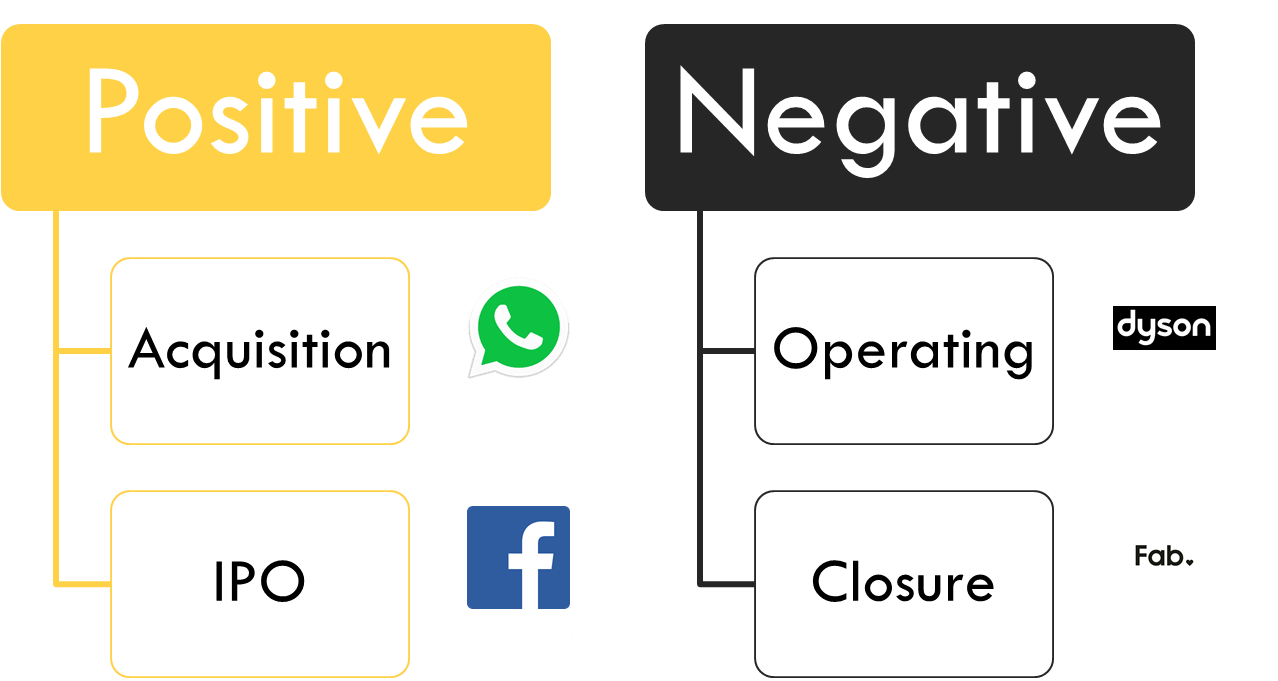

In [300]:
from IPython.display import Image
from IPython.core.display import HTML 

temp_path = 'C:\\Users\\fmqai\\OneDrive\\Projects\\SpringBoard\\Python\\Jupyter\\Images\\Figure 1 Exit types.png'
Image(filename = temp_path, width=800, height=800)

It should be noted that "positive exits" and "negative exits" are not real industry terminology. This is purely a simplification we make to simplify the modelling process.    

A positive exit can be either an [acquisition](http://www.investopedia.com/terms/a/acquisition.asp) or an [IPO](http://www.investopedia.com/terms/i/ipo.asp). Facebook, back in 2012, achieved what was back then the world biggest IPO which valued the company at ~\$90B. Similarly, WhatsApp was acquired by Facebook in 2014 for ~\$19B. At the time, the acquisition was the largest purchase of a venture-backed company in history. Both of these events achieved impressive returns for their VC investors and hence why we term these as 'positive exits.'  

A negative exit occurs when either a firm closes down (e.g. runs out of cash or becomes bankrupt) or continues its life as a private business. The latter may not sound like a particularly negative outcome from the general public's point of view but from a venture capitalists perspective, a company that continues to operate as a private business indefinitely is not a great investment. VCs typically look to return investors their money 5 - 10 years after their intial commitment. With a private business, VCs can only return money by either taking dividends (if any) or selling their stake in the business to another investor (which can be difficult in the private market as opposed to the public markets). Dyson and IKEA are great examples of businesses that are huge today but remain private businesses. Fab is one of hundreds of startups that have failed. You need only look back to the dotcom era to find more examples.   

Obviously, other outcomes are also possible. A venture could also attempt a reverse take-over (positive) or be part of an acqui-hire (negative). Our framework however captures the vast majority of cases.  

### Why is modelling startup exits a useful exercise?

Being able to predict whether a company is likely to achieve a positive exit or a negative exit is valuable information for almost all the players involved in the entrepreneurial ecosystem, not just VC groups. For founders, a positive exit offers the chance to cash in years of hard work accumulated as equity holdings. For support organizations, such as incubators, accelerators and innovation hubs, being able to identify potentially promising candidates allows them to strategically deploy resources to serve entrepreneurial communities. Employees of startups can use this information to assess the value of their stock options. In the past, early employees of notable startups have turned into overnight millionaires when their respective employers IPO'd, (think Google, Microsoft, etc.). 

### So why hasn't this been done before?

Actually, it has! Most recently, by a number of researchers out of Carnegie Mellon University and Microsoft ([A Supervised Approach to Predict Company Acquisition With Factual and Topic
Features Using Profiles and News Articles on TechCrunch](http://www.cs.cmu.edu/~guangx/papers/icwsm12-long.pdf)) which this paper was heavily inspired by.  

### The problem

Predicting startup exits is an extremely tricky business. VCs are typically clever people and as we've already seen, even they're not particularly good at identifying winners from losers. The difficulty stems partly from the fact that startups can fail for a great variety of reasons. For example, the product/service might be ahead of its time. LoudCloud (Marc Andreessen's second startup) did what Amazon and others do today: provide cloud computing services to startups and big companies. It was just too early to market and eventually morphed into a data center operations business called Opsware. Another example, that we've mentioned previously is Pets.com. While there were several issues there, the main one was that it was plagued by a logistical issue. Back then, it simply didn’t make financial sense to ship giant bags of pet food across the country. Today though, several companies have taken advantage of improvements from an improved national delivery network and revived what is essentially the same idea.  

Another reason why this exercise has been a difficult one for machine learning is because data on startups has historically been hard to come by, at least in significnant quantities. As startups are typically structured as private business entities, they are not obligated to record and make public their financial statements. Founders often like to behave secretively so useful information (i.e. information with predictive value) is difficult to come by.  

### The solution 

Today, we have access to data on thousands of startups spread across the globe through CrunchBase, the public startup database. There is a strong possibility that this information, particularly financial and managerial variables, contain predictive value which can be mined for predicting startup exits. Because investors only have access to data on past events, we will use only the data available for the first 3 years of each startups life for modelling and predictions.  

Essentially, our machine learning task is a classification problem. We will evaluate the following machine learning frameworks:  

 * Multinomial Naive Bayes
 * K Nearest Neighbours 
 * SVM
 * Decision Trees
 * Random Forests
 * Gradient Boosted Trees
 * AdaBoost
 * Ensemble Voting Classifier

## Data Collection
CrunchBase provides free access to a snapshot of the data it had collected up until the end of 2013 in the form of SQL dumps. We loaded this data into a MySQL database, exported it as csv files and then read these into python below.   

In [301]:
# load data 

# Ideally, I would be able to assign the filename as the name of the dataframe but without using dangerous exec() 

import os
import glob

temp_path = 'C:\\Users\\fmqai\\OneDrive\\Projects\\SpringBoard\\Python\\Data\\Cleaned Data\\'
all_files = glob.glob(os.path.join(temp_path, "*.csv")) #make list of paths

for file in all_files:
    # Getting the file name without extension
    file_name = os.path.splitext(os.path.basename(file))[0]
    # Reading the file content to create a DataFrame
    print(file_name)
    # read dataframe and assign csv name to dataframe, sadly never figured this part out
    #dfn = pd.read_csv(file)
    
# Instead, I have to use this manual method

try:
    cb_funding_rounds

except NameError:

    temp_path = 'C:\\Users\\fmqai\\OneDrive\\Projects\\SpringBoard\\Python\\Data\\Cleaned Data\\'
    
    # funding
    cb_funding_rounds = pd.read_csv(temp_path + 'cb_funding_rounds.csv')

    # objects
    cb_objects = pd.read_csv(temp_path + 'cb_objects.csv')

    # offices 
    cb_offices = pd.read_csv(temp_path + 'cb_offices.csv')

    # funds
    cb_funds = pd.read_csv(temp_path + 'cb_funds.csv')

    # relationships
    cb_relationships = pd.read_csv(temp_path + 'cb_relationships.csv')

    # milestones 
    cb_milestones = pd.read_csv(temp_path + 'cb_milestones.csv')

    # investments
    cb_investments = pd.read_csv(temp_path + 'cb_investments.csv')
    
    # IPOs
    cb_ipos = pd.read_csv(temp_path + 'cb_ipos.csv')
    
    # acquisitions
    cb_acquisitions = pd.read_csv(temp_path + 'cb_acquisitions.csv')

cb_acquisitions
cb_funding_rounds
cb_funds
cb_investments
cb_ipos
cb_milestones
cb_objects
cb_offices
cb_relationships


### Initial sample of startups
As our data access only goes up to 2013 and because we want 3 years of data for each startup, we select all the startups that were founded before 1st Jan 2011.  

In [302]:
# select columns from cb_objects
a = cb_objects[['id', 'entity_type', 'name', 'category_code', 'status', 'founded_at', 'country_code', 'city', 'twitter_username', 'homepage_url']]

# entity_type can be ['Company', 'FinancialOrg', 'Person', 'Product']
# we only want companies
a = a[a.entity_type=='Company']

# filter out companies for which we don't have a founding date
a = a[a.founded_at.notnull()]

# we only want companies were founded before 2011
a.founded_at = pd.to_datetime(a.founded_at)
a = a[(a.founded_at >= '1990-01-01') & (a.founded_at <= '2010-12-31')]

To reduce the number of dummy variables we will need to make later on in our final dataset, we set countries other than those in the list below to "Small_startup_community." Notably missing from this list is Germany. This is possibly because Germany was still a relative newcomer to the startup scene back in 2013. We do the same with city level data. 

In [303]:
temp = a.copy()

temp = temp.groupby(by = ['country_code']).id.nunique().reset_index()
temp.rename(columns={'id': 'Amount'}, inplace=True)
temp = temp.sort_values(by = 'Amount', ascending = False)
temp = temp[temp.Amount>500]

temp

,country_code,Amount
144,USA,26928
52,GBR,3692
62,IND,1990
27,CAN,1947
40,DEU,944
50,FRA,940
10,AUS,681
67,ISR,567
47,ESP,551


In [304]:
a['country_code'] = np.where(a.country_code.isin(temp.country_code), 
                             a.country_code, 
                             np.where(a.country_code.isnull(), 'Unknown_country', 'Small_startup_country'))

#a.head()

In [305]:
temp1 = a.copy()

temp = ['Silicon Valley', 
        'New York City', 
        'Los Angeles', 
        'Boston', 
        'Tel Aviv', 
        'London', 
        'Chicago', 
        'Seattle', 
        'Berlin', 
        'Singapore', 
        'Paris', 
        'Sao Paulo', 
        'Moscow', 
        'Austin', 
        'Bangalore', 
        'Sydney', 
        'Toronto', 
        'Vancouver', 
        'Amsterdam', 
        'Montreal']

temp1['yoda'] = np.where(temp1.city.isin(temp), 1, 0)
temp1 = temp1[temp1.yoda==1]
temp1.city.unique()

array(['Seattle', 'Austin', 'Chicago', 'Paris', 'Amsterdam', 'Bangalore',
       'Tel Aviv', 'London', 'Boston', 'Moscow', 'Los Angeles', 'Toronto',
       'Berlin', 'Vancouver', 'New York City', 'Singapore', 'Montreal',
       'Sydney', 'Sao Paulo', 'Silicon Valley'], dtype=object)

In [306]:
a['city'] = np.where(a.city.isin(temp), 
                     a.city, 
                     np.where(a.city.isnull(), 'Unknown_city', 'Small_startup_city'))

#a.head()

In [307]:
# add to final dataset
all_data = a

#all_data.head()

Before we try to get more data, we need to set up some code infrastructure. You see, CrunchBase has provided us with all the data that it had up till the end of 2013. For our purposes however, we only want the data for each startup up till the point they reached 3 years of age. These next few pieces of code are aimed at setting up the infrastructure to do this easily.  

In [308]:
from dateutil.relativedelta import  relativedelta

age_lookup = a
age_lookup['cut_off_date'] = age_lookup.founded_at.apply(lambda x: x + relativedelta(years = age_cutoff))
age_lookup = age_lookup[['id', 
                         #'name', 
                         #'founded_at', 
                         'cut_off_date']]
age_lookup.head()

,id,cut_off_date
0,c:1,2008-10-17
3,c:10000,2011-07-26
4,c:10001,2011-07-26
5,c:10002,2010-06-27
6,c:10003,2011-08-20


In [309]:
def closest_date(df, date_col, object_id_col = 'object_id', lookup_table = age_lookup):
    df = pd.merge(df, lookup_table, how='left', left_on = object_id_col, right_on = 'id')
    df = df.sort_values(by = [object_id_col, date_col], ascending = True)
    df = df[df[date_col] < df['cut_off_date']]
    df = df.groupby(by = [object_id_col]).tail(1).drop(['id', 'cut_off_date', date_col], axis = 1)
    
    return(df)

### Offices
Let's start by collecting office data. 

In [310]:
b = cb_offices
#b.head()

In [311]:
# grab number of offices 
b = cb_offices.groupby(by = [cb_offices.object_id]).office_id.nunique().reset_index()
b.rename(columns={'office_id': 'offices'}, inplace=True)

#b.head()

In [312]:
# add to final dataset
all_data = pd.merge(all_data, b, how='left', left_on = 'id', right_on = 'object_id')
all_data.drop('object_id', axis=1, inplace=True)

all_data['offices'] = np.where((all_data.offices.isnull()), 1, all_data['offices'])

#all_data.head()

Disappointingly, we don't have dates associated with office buildings.  
Using this data to predict whether a company will have a positive exit outcome would mean that future data will bleed into our dataset. Using future data to predict the future hardly sounds like a useful exercise. We'll need to remember to remove this data in a later step before we dive into machine learning. 

### Board Members, Employees & Founders
Next, lets collect data about the number of board members, employees and founders each startup has. 

In [313]:
c = cb_relationships

#c.head()

In [314]:
# grab number of founders, employees, board members
c = cb_relationships
c.start_at = pd.to_datetime(c.start_at)
c.end_at = pd.to_datetime(c.end_at)
c = c[['person_object_id', 'relationship_object_id', 'start_at','title']]

# if title is board member
c.loc[c["title"].str.contains('board', case=False, na=False), 'Category'] = 'board'

# otherwise if title includes founder
c.loc[c["title"].str.contains('founder', case=False, na=False), 'Category'] = 'founders'

# otherwise employee
c.loc[c.Category.isnull(), 'Category'] = 'employees'

# cut-off date function
c_temp = c
c = closest_date(c, date_col='start_at', object_id_col='relationship_object_id')

# spread values
c = c.groupby(by = [c.relationship_object_id, c.Category]).person_object_id.nunique().reset_index()
c.rename(columns={'person_object_id': 'count'}, inplace=True)
c = c.pivot_table(index='relationship_object_id', columns='Category', values='count').reset_index()

c_temp = c_temp.groupby(by = ['relationship_object_id', 'Category']).person_object_id.nunique().reset_index()

# founders should have been there from the beginning technically so we don't want to apply cut-off function there
c = c.drop('founders', axis=1)
c1 = cb_relationships
c1 = c1[['person_object_id', 'relationship_object_id', 'start_at','title']]

c1.loc[c1["title"].str.contains('founder', case=False, na=False), 'Category'] = 'founders'

c1 = c1.groupby(by = ['relationship_object_id', 'Category']).person_object_id.nunique().reset_index()
c1.rename(columns={'person_object_id': 'count'}, inplace=True)
c1 = c1.pivot_table(index='relationship_object_id', columns='Category', values='count').reset_index()

# bring founders together with employees and board
c = pd.merge(c, c1, how='outer', left_on = 'relationship_object_id', right_on = 'relationship_object_id')

#c.head()

C:\Users\fmqai\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\fmqai\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [315]:
# add number of founders, employees, board members to all_data
all_data = pd.merge(all_data, c, how='left', left_on = 'id', right_on = 'relationship_object_id')
all_data.drop('relationship_object_id', axis=1, inplace=True)

# this is to replace some NULLS in board and employees columns with 0 because at 3 years of age most companies won't have put up information about board and employees on CrunchBase if they had none.
all_data['board'] = np.where((all_data.board.isnull()) & all_data.id.isin(c_temp.relationship_object_id) & (c_temp.Category=='board'), 0, all_data['board'])
all_data['employees'] = np.where((all_data.employees.isnull()) & all_data.id.isin(c_temp.relationship_object_id) & (c_temp.Category=='employees'), 0, all_data['employees'])
#all_data['founders'] = np.where((all_data.founders.isnull()) & all_data.id.isin(c_temp.relationship_object_id) & (c_temp.Category=='founders'), 1, all_data['founders'])

#all_data.head()

### Milestones
Next, let's grab data about the number of milestones each startup has achieved.  
A milestone, upon investigaton, tends to be each time a startup has been mentioned in the news for whatever achievement it's managed to do (or not do). Note, that this can just as easily be a technological milestones as a funding milestone. 

In [316]:
d = cb_milestones 

#d.head()

In [317]:
d = cb_milestones
d_temp = d

d.milestone_at = pd.to_datetime(d.milestone_at)
d = d.groupby(by = ['object_id', 'milestone_at']).id.nunique().groupby(level=[0]).cumsum().reset_index()
d.rename(columns={'id': 'milestones'}, inplace=True)

# cut-off date function
d = closest_date(d, 'milestone_at')

#d.head(10)

In [318]:
# add number of milestones
all_data = pd.merge(all_data, d, how='left', left_on = 'id', right_on = 'object_id')
all_data.drop('object_id', axis=1, inplace=True)

# this is to replace NULLS with 0 because at age_cutoff some companies may not have achieved any milestones by that time but do later on
all_data['milestones'] = np.where((all_data.milestones.isnull()) & all_data.id.isin(d_temp.object_id), 0, all_data['milestones'])

#all_data.head()

### Number of funding events
Next we collect data about the number of funding events each company has had.  
My hypothesis is that those companies taht receive funding early are more likely to be those that achieve a positive exit later on.  

In [319]:
e = cb_funding_rounds

#e.head()

In [320]:
# Number of funding events
e = cb_funding_rounds
e_temp = e

e.funded_at = pd.to_datetime(e.funded_at)
e = e.groupby(by = ['object_id', 'funded_at']).funding_round_id.nunique().groupby(level=[0]).cumsum().reset_index()
e.rename(columns={'funding_round_id': 'funding_events'}, inplace=True)

# cut-off date function
e = closest_date(e, 'funded_at')

#e.head()

In [321]:
# add number of funding events to all_data
all_data = pd.merge(all_data, e, how='left', left_on = 'id', right_on = 'object_id')
all_data.drop('object_id', axis=1, inplace=True)

# this is to replace NULLS with 0 because at age_cutoff some companies may not have had any funding events by that time but do so later
all_data['funding_events'] = np.where((all_data.funding_events.isnull()) & all_data.id.isin(e_temp.object_id), 0, all_data['funding_events'])

#all_data.head()

### Total Raised to Date
Next we collect data about the total funding amount raised by each company when they were 3 years old.  
My hypothesis is that those companies that those companies which receieved more are more likely to be those that achieve a positive exit later on.  

In [322]:
f = cb_funding_rounds

#f.head()

In [323]:
# Total raised to date
f = cb_funding_rounds
f_temp = f

f.funded_at = pd.to_datetime(f.funded_at)
f = f.groupby(by = ['object_id', 'funded_at']).raised_amount_usd.sum().groupby(level=[0]).cumsum().reset_index()
f.rename(columns={'raised_amount_usd': 'total_raised_to_date'}, inplace=True)

# cut-off date function
f = closest_date(f, 'funded_at')

f['total_raised_to_date'] = np.where(f.total_raised_to_date.isnull(), 0 , f['total_raised_to_date'])

#f.head()

In [324]:
# add total raised to date
all_data = pd.merge(all_data, f, how='left', left_on = 'id', right_on = 'object_id')
all_data.drop('object_id', axis=1, inplace=True)

# this is to replace NULLS with 0 because at age_cutoff some companies may not have raised any funding by that time but do so later on
all_data['total_raised_to_date'] = np.where((all_data.total_raised_to_date.isnull()) & all_data.id.isin(f_temp.object_id), 0, all_data['total_raised_to_date'])

#all_data.head()

### Funding Amount Last Raised
Next we collect data about the amount of funding last raised by each company when they were 3 years old.  
My hypothesis is that those companies that those companies that raised more are more likely to be those that achieve a positive exit later on.  

In [325]:
g = cb_funding_rounds

#g.head()

In [326]:
# last raised amount
g = cb_funding_rounds
g_temp = g

g.funded_at = pd.to_datetime(g.funded_at)

g = g.sort_values(by = ['object_id', 'funded_at'], ascending = True)
g = g.groupby(by = ['object_id', 'funded_at']).head(1).reset_index(drop=True)
g = g[['object_id', 'funded_at', 'raised_amount_usd']]
g.rename(columns={'raised_amount_usd': 'last_raised_amount'}, inplace=True)

# cut-off date function
g = closest_date(g, 'funded_at')

g['last_raised_amount'] = np.where(g.last_raised_amount.isnull(), 0 , g['last_raised_amount'])

#g.head()

In [327]:
# add last raised amount
all_data = pd.merge(all_data, g, how='left', left_on = 'id', right_on = 'object_id')
all_data.drop('object_id', axis=1, inplace=True)

# this is to replace NULLS with 0 because at age_cutoff some companies may not have raised any funding by that time but do so later on
all_data['last_raised_amount'] = np.where((all_data.last_raised_amount.isnull()) & all_data.id.isin(g_temp.object_id), 0, all_data['last_raised_amount'])

#all_data.head()

### Top VC backing
Next we collect data about how many top VCs have invested in a given company by the time the company reached 3 years of age.  
My hypothesis is that those companies that have received backing from a top VC are more are more likely to be those that achieve a positive exit later on.  

I use this list of 108 top VCs (sourced from Wikipedia), as another feature. 

In [328]:
# list of 108 top venture capital firms
# Comes from https://en.wikipedia.org/wiki/List_of_venture_capital_firms
# this list is likely biased to the USA, which is fine since I'm only looking at startups in the USA anyway
temp = ['3i Group',
'Advanced Technology Ventures',
'Accel Partners',
'Andreessen Horowitz',
'Atlas Venture',
'Atomico',
'August Capital',
'Austin Ventures',
'Avalon Ventures',
'Azure Capital Partners',
'Bain Capital Ventures',
'Balderton Capital',
'Battery Ventures',
'Benchmark',
'Bessemer Venture Partners',
'Binary Capital',
'BitChemy Ventures',
'Black Coral Capital',
'Canvas Venture Fund',
'Carmel Ventures',
'Charles River Ventures',
'Clearstone Venture Partners',
'Columbus Nova Technology Partners',
'Costanoa Venture Capital',
'Crosslink Capital',
'CrunchFund',
'DAG Ventures',
'Data Collective',
'Digital Sky Technologies',
'Draper Fisher Jurvetson (DFJ)',
'Elevation Partners',
'ff Venture Capital',
'Fidelity Ventures',
'FirstMark Capital',
'First Round Capital',
'Flybridge Capital Partners',
'Foundation Capital',
'Founders Fund',
'Galen Partners',
'General Catalyst Partners',
'Genesis Partners',
'Golden Gate Ventures',
'GGV Capital',
'Google Ventures',
'Granite Ventures',
'Greylock Partners',
'Harris & Harris Group',
'HealthCap',
'Highland Capital Partners',
'Horizons Ventures',
'IDG Ventures',
'Initialized Capital',
'Iona Capital',
'In-Q-Tel',
'Index Ventures',
'Innovacom',
'Insight Venture Partners',
'Intel Capital',
'Intellectual Ventures',
'Institutional Venture Partners',
'Internet Capital Group',
'Inventus Capital Partners',
'Israel Cleantech Ventures',
'Jerusalem Venture Partners',
'JMI Equity',
'Kapor Capital',
'Kleiner Perkins Caufield & Byers',
'Khosla Ventures',
'Lightspeed Venture Partners',
'Lux Capital',
'Matrix Partners',
'Maveron',
'Mayfield Fund',
'Menlo Ventures',
'Meritech Capital Partners',
'Morgenthaler Ventures',
'New Enterprise Associates',
'Nexit Ventures',
'Norwest Venture Partners',
'Oak Investment Partners',
'Oregon Angel Fund',
'OpenView Venture Partners',
'Polaris Partners',
'Quicksilver Ventures',
'Radius Ventures',
'Redpoint Ventures',
'Revolution',
'Rho Ventures',
'RRE Ventures',
'Rothenberg Ventures',
'Sante Ventures',
'Scale Venture Partners',
'Shenzhen Capital Group',
'Scottish Equity Partners',
'Sequoia Capital',
'Seventure Partners',
'Sevin Rosen Funds',
'Social Capital',
'Sofinnova Ventures',
'SoftTech VC',
'Spark Capital',
'Tenaya Capital',
'Third Rock Ventures',
'Union Square Ventures',
'US Venture Partners',
'VantagePoint Capital Partners',
'Venrock',
'Wellington Partners']

In [329]:
h = cb_investments
h.head()

,id,funding_round_id,funded_object_id,investor_object_id,created_at,updated_at
0,1,1,c:4,f:1,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,1,c:4,f:2,2007-07-04 04:52:57,2008-02-27 23:14:29
2,3,3,c:5,f:4,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,f:1,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,4,c:5,f:5,2007-05-27 06:09:36,2013-06-28 20:07:24


In [330]:
h = cb_investments
h = h[['funding_round_id', 'investor_object_id', 'funded_object_id']]

# add funding round date
temp1 = cb_funding_rounds

temp1.funded_at = pd.to_datetime(temp1.funded_at)

temp1 = temp1[['funding_round_id', 'funded_at']]
h = pd.merge(h, temp1, how='left', left_on = 'funding_round_id', right_on = 'funding_round_id')

h.head()

# Grab VC name
temp1 = cb_objects
temp1 = temp1[temp1['entity_type']=='FinancialOrg']
temp1 = temp1[['id', 'name']]
temp1.head()

h = pd.merge(h, temp1, how='left', left_on = 'investor_object_id', right_on = 'id')
h.drop(['id'], axis=1, inplace=True)
h.rename(columns={'name': 'funder_name'}, inplace=True)

h_temp = h

h['top_vc_backed'] = np.where(h.funder_name.isin(temp), 1, 0)
h = h[h.top_vc_backed==1]

h = h[['funded_object_id', 'funded_at', 'investor_object_id', 'funder_name', 'top_vc_backed']]

# There's two ways to go about this.

# Option #1
# Counts the number of unique top VC's that have backed the startup by each date
h = h.groupby(by = ['funded_at', 'funded_object_id']).investor_object_id.nunique().groupby(level=[0]).cumsum().reset_index()
h.rename(columns={'investor_object_id': 'top_vc_backed'}, inplace=True)

# Option #2
# Counts the total number of times a top VC has invested in a startup by each date
#h = h.groupby(by = ['funded_object_id', 'funded_at']).investor_object_id.nunique().groupby(level=[0]).cumsum().reset_index()

h = h.sort_values(by = ['funded_object_id', 'funded_at'])

# cut-off date function
h = closest_date(h, date_col = 'funded_at', object_id_col = 'funded_object_id')

h.head(10)
#h_temp.head()

,funded_object_id,top_vc_backed
1,c:1,2
2,c:1001,1
4,c:10015,1
10,c:10054,2
18,c:1010,1
25,c:10159,3
28,c:10161,1
33,c:10176,3
36,c:10179,2
40,c:1019,2


In [331]:
# To see which top funders do not appear in our dataset at all
i = cb_investments
i = i[['funding_round_id', 'investor_object_id', 'funded_object_id']]

# add funding round date
temp1 = cb_funding_rounds

temp1.funded_at = pd.to_datetime(temp1.funded_at)

temp1 = temp1[['funding_round_id', 'funded_at']]
i = pd.merge(i, temp1, how='left', left_on = 'funding_round_id', right_on = 'funding_round_id')

# Grab VC name
temp1 = cb_objects
temp1 = temp1[temp1['entity_type']=='FinancialOrg']
temp1 = temp1[['id', 'name']]
temp1.head()

i = pd.merge(i, temp1, how='left', left_on = 'investor_object_id', right_on = 'id')
i.drop(['id'], axis=1, inplace=True)
i.rename(columns={'name': 'funder_name'}, inplace=True)

def temp_func(row):
    if row['funder_name'] in temp:
        return 1
    else:
        return 0

i['top_vc_backed'] = i.apply(temp_func, axis=1)

i = i['funder_name'].reset_index().drop_duplicates(subset='funder_name')
i['abc'] = 'yes'

temp1 = pd.DataFrame(temp)
temp1.rename(columns={0: 'funder_name'}, inplace=True)
temp1 = pd.merge(temp1, i, how='left', left_on='funder_name', right_on='funder_name')
temp1 = temp1[temp1.abc.isnull()]
temp1

,funder_name,index,abc
15,Binary Capital,NaN,NaN
16,BitChemy Ventures,NaN,NaN
52,Iona Capital,NaN,NaN
58,Intellectual Ventures,NaN,NaN
86,Revolution,NaN,NaN


In [332]:
# add top VC backing
all_data = pd.merge(all_data, h, how='left', left_on = 'id', right_on = 'funded_object_id')
all_data.drop('funded_object_id', axis=1, inplace=True)

# this is to replace NULLS with 0 because at age_cutoff some companies may not have received backing from a top VC by that time but do so later on
all_data['top_vc_backed'] = np.where((all_data.top_vc_backed.isnull()) & all_data.id.isin(h_temp.funded_object_id), 0, all_data['top_vc_backed'])

all_data.head()

,id,entity_type,name,category_code,status,founded_at,country_code,city,twitter_username,homepage_url,cut_off_date,offices,board,employees,founders,milestones,funding_events,total_raised_to_date,last_raised_amount,top_vc_backed
0,c:1,Company,Wetpaint,web,operating,2005-10-17,USA,Seattle,BachelrWetpaint,http://wetpaint-inc.com,2008-10-17,2.0,1.0,NaN,2.0,0.0,3.0,39750000.0,25000000.0,2.0
1,c:10000,Company,MYWEBBO,network_hosting,operating,2008-07-26,Unknown_country,Unknown_city,NaN,http://www.mywebbo.com,2011-07-26,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,c:10001,Company,THE Movie Streamer,games_video,operating,2008-07-26,Unknown_country,Unknown_city,NaN,http://themoviestreamer.com,2011-07-26,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,c:10002,Company,Synergie Media,advertising,operating,2007-06-27,Small_startup_country,Small_startup_city,NaN,http://www.synergie-media.com,2010-06-27,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,c:10003,Company,Green Basti Ecosystems,cleantech,operating,2008-08-20,IND,Small_startup_city,NaN,NaN,2011-08-20,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### TechCrunch articles
Next we grab data about the number of techcrunch articles a company has had written about it by the time they were 3 years old.  
My hypothesis is that those companies that have had a techcrunch article written about them are more likely to be those that achieve a positive exit later on.  

In [333]:
i  = cb_milestones

#i.head()

In [334]:
from urllib.parse import urlparse

# number of techcrunch articles
i  = cb_milestones

i.milestone_at = pd.to_datetime(i.milestone_at)

i = i[['milestone_at', 'object_id', 'source_url']]

i_temp = i

i['valid_url'] = i['source_url'].isnull()

def temp_func(row):
    if row['valid_url']:
        return np.nan
    else: 
        parsed_uri = urlparse(row['source_url'])
        domain = '{uri.scheme}://{uri.netloc}/'.format(uri = parsed_uri)
        return domain

i['source'] = i.apply(temp_func, axis=1)

i = i[i.source.str.contains(pat = 'techcrunch', case = False)==True]
i = i.drop_duplicates()
i = i.groupby(by = ['object_id', 'milestone_at']).size().groupby(level=[0]).cumsum().reset_index()
i.rename(columns={0: 'tc_articles'}, inplace=True)

# cut-off date function
i = closest_date(i, date_col = 'milestone_at')

#i.head()

C:\Users\fmqai\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\fmqai\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [335]:
# add number companies founded previously by company founders
all_data = pd.merge(all_data, i, how='left', left_on = 'id', right_on = 'object_id')
all_data.drop('object_id', axis=1, inplace=True)

# this is to replace NULLS with 0 because at age_cutoff some companies may not have had any tc articles by that time but do so later on
all_data['tc_articles'] = np.where((all_data.tc_articles.isnull()) & all_data.id.isin(i_temp.object_id), 0, all_data['tc_articles'])

#all_data.head()

### Companies founded
Next we collect data about the number of companies founded by founders of a given company prior to the given company.  
My hypothesis is that those companies founded by more experienced founders are more likely to achieve a positive exit later on.  

In [336]:
k = cb_relationships

#k.head()

In [337]:
k = cb_relationships

k.loc[k["title"].str.contains('founder', case=False, na=False), 'category'] = 'founder'

k = k[k['category']=='founder']
k = k[['person_object_id', 'relationship_object_id', 'start_at', 'category']]
k = k.drop_duplicates()

temp = k[['person_object_id', 'start_at', 'relationship_object_id']]
temp.rename(columns={'relationship_object_id': 'assoc_company'}, inplace=True)

k = pd.merge(k, temp, how='left', left_on = 'person_object_id', right_on = 'person_object_id')

k['remove'] = np.where(k.relationship_object_id==k.assoc_company, 'same', 'different')
k = k[k['remove']=='different']

k['companies_founded_previously'] = np.nan
k.loc[k.start_at_y < k.start_at_x, 'companies_founded_previously'] = 1
k.loc[k.start_at_y > k.start_at_x, 'companies_founded_previously'] = 0
k.loc[k.start_at_x.isnull(), 'companies_founded_previously'] = np.nan
k.loc[k.start_at_y.isnull(), 'companies_founded_previously'] = np.nan

k_temp = k
k = k[k.companies_founded_previously.notnull()]

k = k.groupby(by = ['relationship_object_id']).companies_founded_previously.sum().reset_index()

#k.head(10)
#k_temp.head()

C:\Users\fmqai\Anaconda3\lib\site-packages\pandas\core\frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [338]:
# add number companies founded previously by company founders
all_data = pd.merge(all_data, k, how='left', left_on = 'id', right_on = 'relationship_object_id')
all_data.drop('relationship_object_id', axis=1, inplace=True)

#all_data.head()

That's it!  
We've collected all the data we can from just CrunchBase. 

### Further Potential Improvements

Future potential improvements in this section could be to: 

 * Use twitter data (e.g. number of follower) to add additional features (depends on if you can get timestamp data) 
 * Use twitter and website data to determine if a company has closed down
 * Clean up the region data to get it into a more useful format

## Exploratory Data Analysis (EDA)
Let's take a look at how much data we've collected so far. 

In [339]:
# get rid of these columns as these are not features we will use for machine learning
all_data = all_data.drop(['entity_type', 'name', 'twitter_username', 'homepage_url', 'offices'], axis=1)
all_data = all_data[all_data['category_code'].notnull()]
all_data = all_data.drop('cut_off_date', axis = 1)

In [340]:
len(all_data)

57145

The general rule of thumb in the industry is that if you have less than 10,000 data points, there's no point in attempting any machine learning. Luckily, we've cleared this (admittedly arbitrary) hurdle by a wide margnin. Now, lets take a look at the bane of all data scientists alike; missing data. 

In [341]:
import missingno as msno

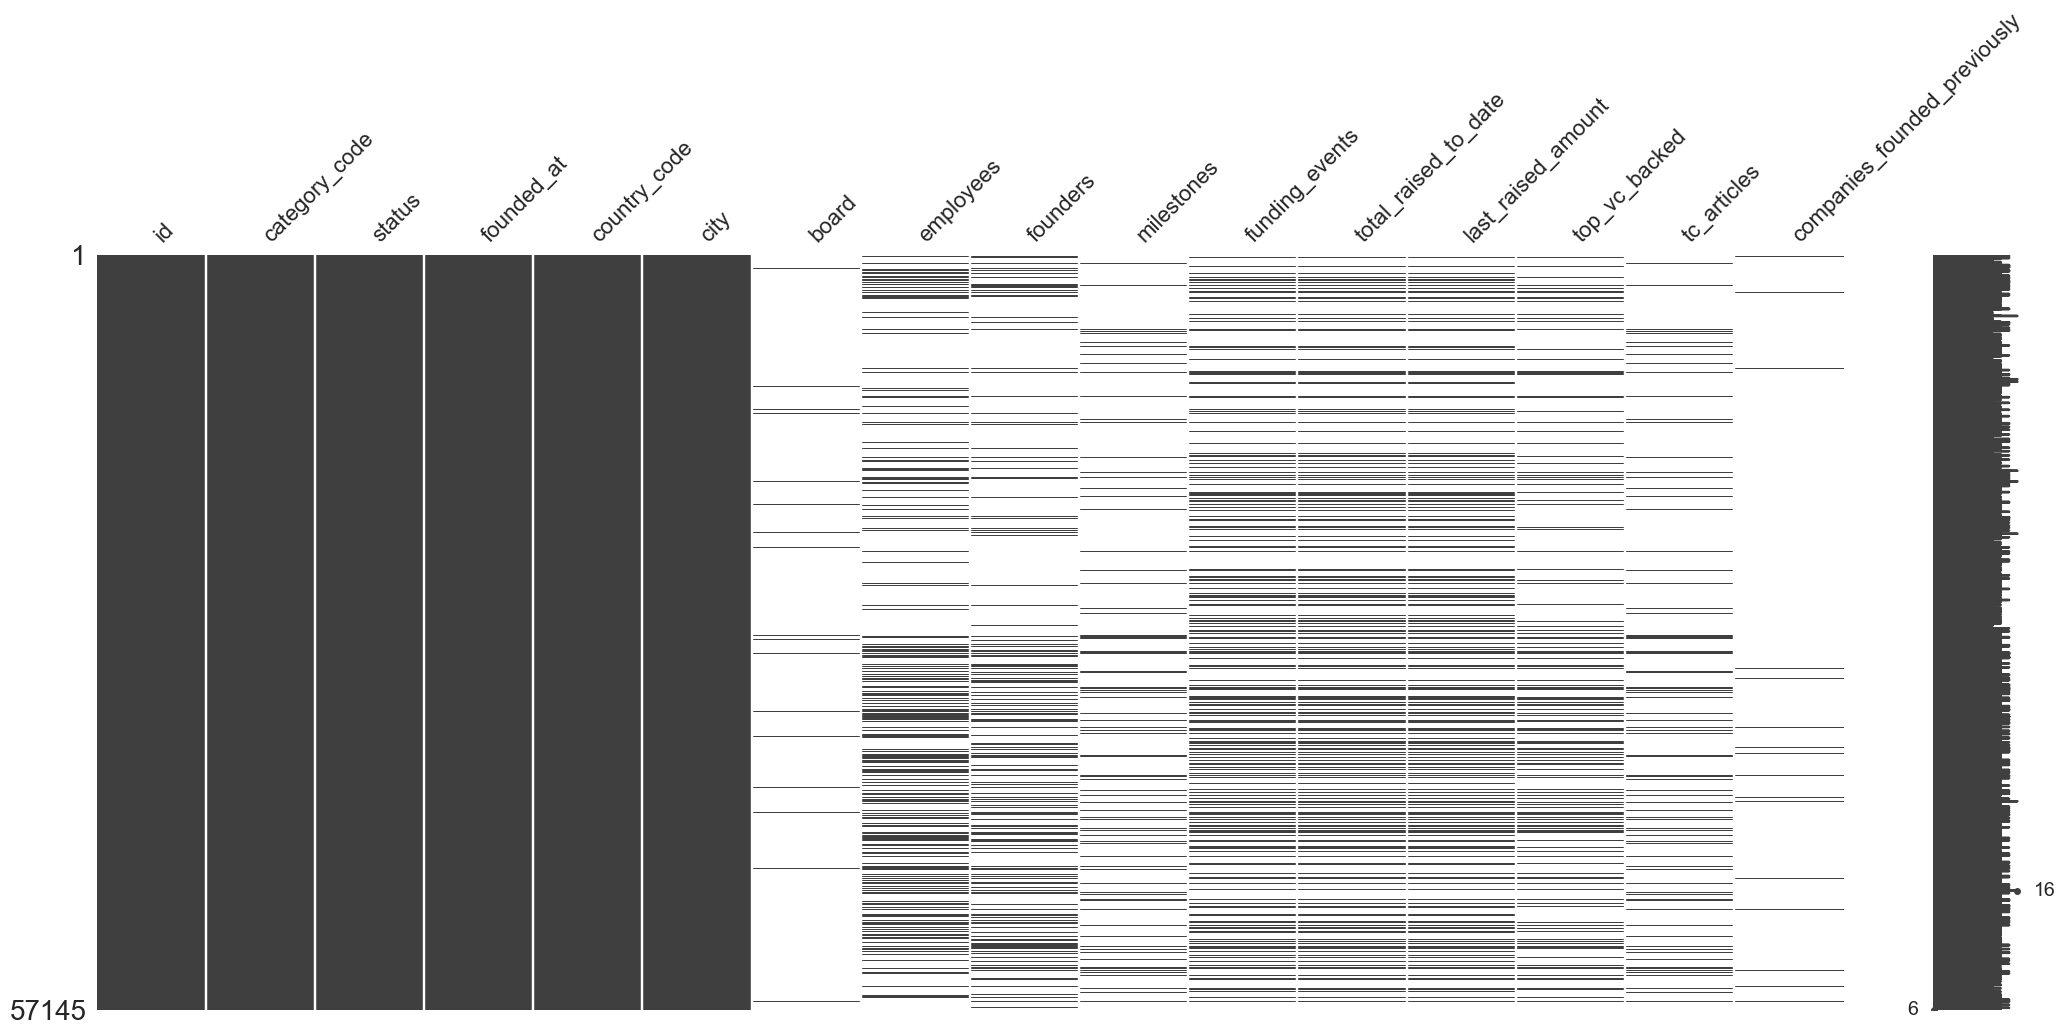

In [342]:
msno.matrix(all_data, freq=False)

plt.savefig(fig_path + 'missing_data.png', bbox_inches='tight', transparent=True)
plt.close()

Some columns are apparently better populated with data than others. In some cases its obvious why a column has a lot of missing data, e.g. board has a lot of missing data likely because most companies probably didn't have any board members when they were 3 years old or less. In other cases, the reasons are less obvious. 

There are several ways one could go about filling in the missing data although not all are necessarily practical. Before we do go about filling in the missing data though, it's best to do some exploratory data analysis to get a better understanding of our data. 

Let's start by looking at the number of companies founded by year. 

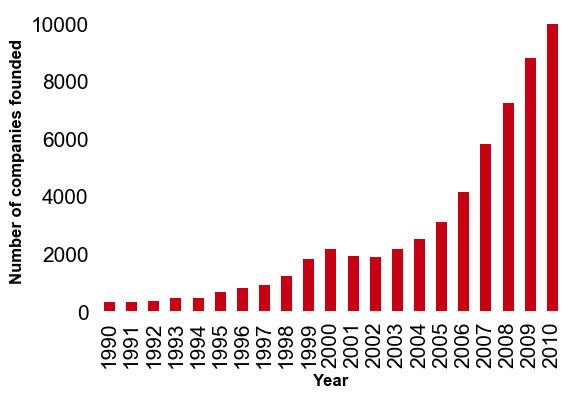

In [344]:
temp = all_data.groupby(by = [all_data.founded_at.dt.year]).id.nunique().reset_index()
temp.rename(columns={'id': 'Amount'}, inplace=True)

ax = temp.plot(x = 'founded_at', y = 'Amount', rot = 90, kind = 'bar', color = color1)

ax.legend().set_visible(False)

ax.set_facecolor('white')
ax.grid(b=False)

ax.tick_params(axis=u'both', which=u'both', length=0)

#ax.set_title("", main_font,  fontweight = 'bold', fontsize = 15, position = [.5,1.05])
ax.set_ylabel("Number of companies founded", main_font, fontsize = 12, fontstyle = 'normal', fontweight = 'bold', color = graph_font_color)
ax.set_xlabel("Year", main_font, fontsize = 12, fontstyle = 'normal', fontweight = 'bold', color = graph_font_color)

ax.tick_params(axis='x', colors = graph_font_color)
ax.tick_params(axis='y', colors = graph_font_color)

plt.savefig(fig_path + 'founded_by_year.png', bbox_inches='tight', transparent=True)

While the data appears to imply that entrepreneurship is a recent fad, you have to keep in mind the fact that CrunchBase itself was only founded in 2007. Its likely that data before 2007 is significantly underrepresented.    

Next, let's take a look at how many IPOs, acquisitions, closures and operating companies we have in our dataset. 

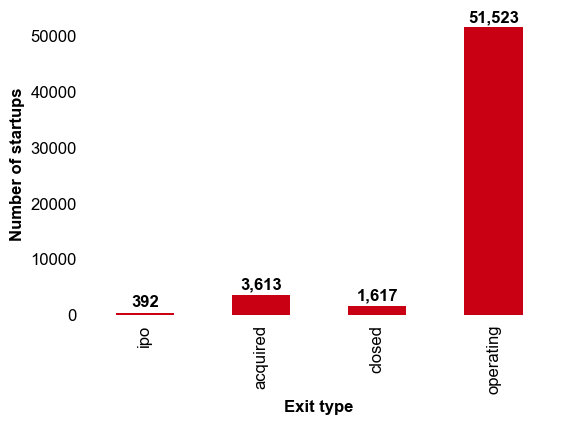

In [188]:
temp = all_data.groupby(by = [all_data.status]).id.nunique().reset_index()
temp.rename(columns={'id': 'Amount'}, inplace=True)

temp = temp.reindex([2, 0, 1, 3])

ax = temp.plot(x = 'status', y = 'Amount', rot = 90, kind = 'bar', color = color1)

ax.legend().set_visible(False)

ax.set_facecolor('white')
ax.grid(b=False)

ax.tick_params(axis=u'both', which=u'both',length=0)

#ax.set_title("", main_font,  fontweight = 'bold', fontsize = 15, position = [.5,1.05])

ax.set_ylabel("Number of startups", main_font, fontsize = 12, fontstyle = 'normal', fontweight = 'bold', color = graph_font_color)
ax.tick_params(axis='y', labelsize = 12)

ax.set_xlabel("Exit type", main_font, fontsize = 12, fontstyle = 'normal', fontweight = 'bold', color = graph_font_color)
ax.tick_params(axis='x', labelsize = 12)
#ax.get_xaxis().set_visible(False)

ax.tick_params(axis='x', colors=graph_font_color)
ax.tick_params(axis='y', colors=graph_font_color)

for i, x in enumerate(temp.Amount):
    ax.text(x = i, y = x+1000, s = np.where(x>0, "{:,}".format(int(round(x, 0))), ''), rotation="0", ha='center', color = graph_font_color, fontsize = 12, fontstyle = 'normal', fontweight = 'bold')

if export_fig==True:
    plt.savefig(fig_path + 'exits_distribution.png', bbox_inches='tight', transparent=True)

The number of closed companies is likely to be highly underrepresented in our sample and a large portion of operating companies will likely classify as closed. While this would normally be a problem, for our purposes it does not matter since both operating companies and closed companies will be treated as negative outcomes. Our positive outcomes are those companies that have been acquired or IPO'd. 

What's immediately obvious from the above picture is that our data is significaly imbalanced. Generally speaking, machine learning techniques work best with balanced datasets. We'll have to keep this in mind when we get to that stage.  

Now, let's see how many startups we have in each sector. 

In [189]:
min_sample_size_sector = 1300

In [190]:
temp = all_data.copy()

temp = temp.groupby(['category_code']).id.nunique().reset_index()
temp.rename(columns={'id': 'Amount'}, inplace=True)
temp = temp[temp.Amount>min_sample_size_sector].sort_values(by = 'Amount')

temp.head()

,category_code,Amount
25,network_hosting,1458
31,public_relations,1634
3,biotech,2061
9,enterprise,2284
5,consulting,2895


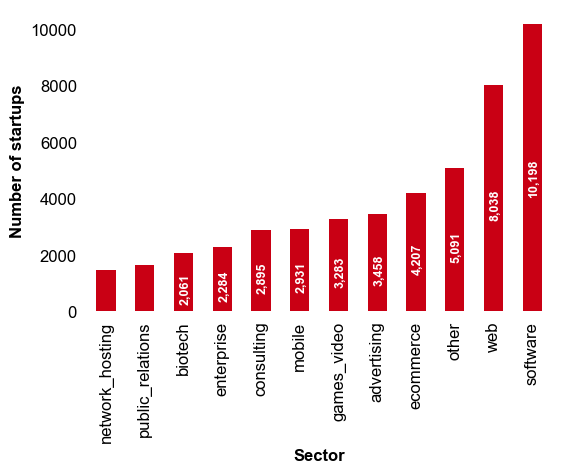

In [191]:
ax = temp.plot(x = 'category_code', y = 'Amount', rot = 90, kind = 'bar', color = color1)

ax.legend().set_visible(False)

ax.set_facecolor('white')
ax.grid(b=False)

ax.tick_params(axis=u'both', which=u'both',length=0)

ax.set_ylabel("Number of startups", main_font, fontsize = 12, fontstyle = 'normal', fontweight = 'bold', color = graph_font_color)
ax.tick_params(axis='y', labelsize = 12)

ax.set_xlabel("Sector", main_font, fontsize = 12, fontstyle = 'normal', fontweight = 'bold', color = graph_font_color)
ax.tick_params(axis='x', labelsize = 12)
#ax.get_xaxis().set_visible(False)

ax.tick_params(axis='x', colors=graph_font_color)
ax.tick_params(axis='y', colors=graph_font_color)

for i, x in enumerate(temp.Amount):
    ax.text(x = i+0.05, y = x/2, s = np.where(x>2000, "{:,}".format(int(round(x, 0))), ''), rotation="90", ha='center', color = graph_font_color_2, fontsize = 9, fontstyle = 'normal', fontweight = 'bold')

if export_fig==True:
    plt.savefig(fig_path + 'sector_distribution.png', bbox_inches='tight', transparent=True)

Now let's see the ratio of positive and negative exits by industry. 

In [192]:
temp = all_data.copy()

temp['exit'] = np.where(temp.status.isin(['acquired', 'ipo']), 'positive', 'negative')

temp['total'] = temp.groupby(['category_code'])['id'].transform(lambda x: x.nunique())
temp = temp[temp.total>min_sample_size_sector]

temp = temp.groupby(['category_code', 'exit']).id.nunique().reset_index()

temp.rename(columns={'id': 'amount'}, inplace=True)

temp['prcnt'] = temp.groupby(['category_code'])['amount'].transform(lambda x: x / float(x.sum()))

temp['total'] = temp.groupby(['category_code'])['amount'].transform(lambda x: x.sum())
temp = temp[temp.total>min_sample_size_sector]

temp = temp.pivot_table(index='category_code', columns='exit', values='prcnt').reset_index()
temp = temp.sort_values(by = 'negative')
temp = temp.set_index('category_code')
temp = temp[['positive', 'negative']]

temp.head()

exit,positive,negative
category_code,,
biotech,0.134886,0.865114
enterprise,0.111646,0.888354
network_hosting,0.094650,0.905350
mobile,0.094507,0.905493
software,0.087468,0.912532


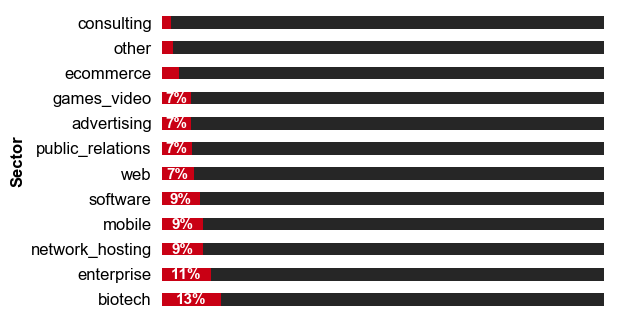

In [193]:
ax = temp.plot.barh(stacked=True, color = [color1, color3])

ax.legend().set_visible(False)

ax.set_facecolor('white')
ax.grid(b=False)

#ax.set_title("Positive vs Negative Exits by Category", main_font, fontweight = 'bold', fontsize = 12, position = [.5,1.05])

ax.set_ylabel("Sector", main_font, fontsize = 12, fontstyle = 'normal', fontweight = 'bold', color = graph_font_color)
ax.tick_params(axis='y', labelsize = 12)

ax.set_xlabel("", main_font, fontsize = 12, fontstyle = 'normal', fontweight = 'bold', color = graph_font_color)
ax.get_xaxis().set_visible(False)

ax.tick_params(axis='x', colors=graph_font_color)
ax.tick_params(axis='y', colors=graph_font_color)

for i, x in enumerate(temp.positive):
    ax.text(x = x - x/2, y = i-0.2, s = np.where(x>0.05, str(int(round(x*100, 0))) + '%', ''), ha='center', color = graph_font_color_2, fontsize = 11, fontstyle = 'normal', fontweight = 'bold')

if export_fig==True:
    plt.savefig(fig_path + 'ratio_positive_negative_by_sector.png', bbox_inches='tight', transparent=True)

Next lets look at the average time to acquisition by sector. 

In [194]:
temp_ipos = cb_ipos.copy()
temp_ipos = temp_ipos[['object_id', 'public_at']]
temp_ipos['public_at'] = pd.to_datetime(temp_ipos.public_at)
temp_ipos.head()

temp_acquisitions = cb_acquisitions.copy()
temp_acquisitions = temp_acquisitions[['acquired_object_id', 'acquired_at']]
temp_acquisitions['acquired_at'] = pd.to_datetime(temp_acquisitions.acquired_at)
temp_acquisitions.head()

temp = all_data.copy()
temp = temp[['id', 'category_code', 'founded_at', 'status']]

temp['total'] = temp.groupby(['category_code'])['id'].transform(lambda x: x.nunique())
temp = temp[temp.total>min_sample_size_sector]

temp = temp[(temp.status =='acquired') | (temp.status =='ipo')]

temp = pd.merge(temp, temp_ipos, how='left', left_on = 'id', right_on = 'object_id')
temp.drop('object_id', axis=1, inplace=True)

temp = pd.merge(temp, temp_acquisitions, how='left', left_on = 'id', right_on = 'acquired_object_id')
temp.drop('acquired_object_id', axis=1, inplace=True)

temp['exit_at'] = np.where(temp.status=='acquired', temp.acquired_at, temp.public_at)

temp = temp[['id', 'category_code', 'status', 'founded_at', 'exit_at']]

temp['time_to_exit'] = (temp['exit_at'] - temp['founded_at']).astype('timedelta64[M]')
temp = temp[temp.exit_at.notnull()]
temp = temp[temp.time_to_exit>0] # remove stupid values

temp = temp.groupby(by = ['category_code']).time_to_exit.mean().reset_index()
temp = temp.sort_values(by = 'time_to_exit')

temp.head()

,category_code,time_to_exit
11,web,65.510101
5,games_video,70.396313
0,advertising,77.200000
3,ecommerce,77.568047
6,mobile,84.124088


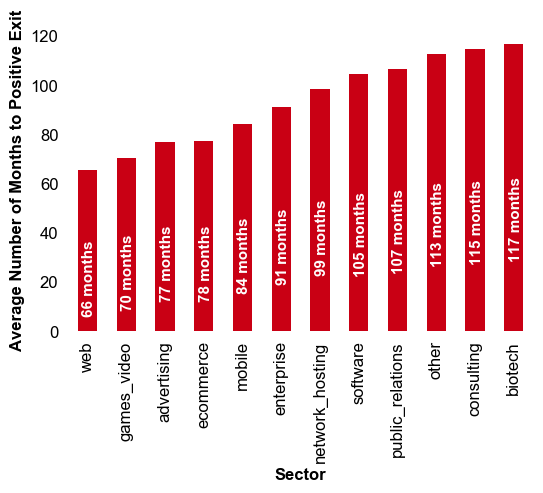

In [195]:
ax = temp.plot(x = 'category_code', y = 'time_to_exit', rot = 90, kind = 'bar', color = color1)

ax.set_facecolor('white')
ax.grid(b=False)

ax.legend().set_visible(False)

ax.tick_params(axis=u'both', which=u'both',length=0)

ax.set_ylabel("Average Number of Months to Positive Exit", main_font, fontsize = 12, fontstyle = 'normal', fontweight = 'bold', color = graph_font_color)
ax.tick_params(axis='y', labelsize = 12)

ax.set_xlabel("Sector", main_font, fontsize = 12, fontstyle = 'normal', fontweight = 'bold', color = graph_font_color)
ax.tick_params(axis='x', labelsize = 12)
#ax.get_xaxis().set_visible(False)

ax.tick_params(axis='x', colors=graph_font_color)
ax.tick_params(axis='y', colors=graph_font_color)

for i, x in enumerate(temp.time_to_exit):
    ax.text(x = i+0.05, y = x - x/2, s = np.where(x>0, str(int(round(x, 0))) + ' months', ''), rotation="90", ha='center', color = graph_font_color_2, fontsize = 11, fontstyle = 'normal', fontweight = 'bold')

if export_fig==True:
    plt.savefig(fig_path + 'months_to_exit_by_category.png', bbox_inches='tight', transparent=True)

Let's see how positive exits vary by funding range. 

In [196]:
temp = all_data.copy()

# Define bins as 0 to 1, 1 to 1M, 1M to 3M, 3M to 5M, 5M to 10M, 10M to 1B 
bins = [-1, 1, 1000000, 3000000, 5000000, 10000000, 1000000000]

# Create names for the four groups
group_names = ['\\$0', '\\$0 to \\$1M', '\\$1M to \\$3M', '\\$3M to \\$5M', '\\$5M to \\$10M', '\\$10M to \\$1B']

# Cut total_raised_to_date
temp['funding_category'] = pd.cut(temp.total_raised_to_date, bins, labels=group_names)

temp = temp[temp.total_raised_to_date.notnull()]

temp['exit'] = np.where(temp.status.isin(['acquired', 'ipo']), 'positive', 'negative')

temp = temp.groupby(['funding_category', 'exit']).id.nunique().reset_index()

temp['prcnt'] = temp.groupby(['funding_category'])['id'].transform(lambda x: x/sum(x))

temp = temp.pivot_table(index='funding_category', columns='exit', values='prcnt').reset_index()
temp = temp[['funding_category', 'positive', 'negative']] 

temp.head()

exit,funding_category,positive,negative
0,\$0,0.122221,0.877779
1,\$0 to \$1M,0.054748,0.945252
2,\$1M to \$3M,0.116107,0.883893
3,\$3M to \$5M,0.178756,0.821244
4,\$5M to \$10M,0.176471,0.823529


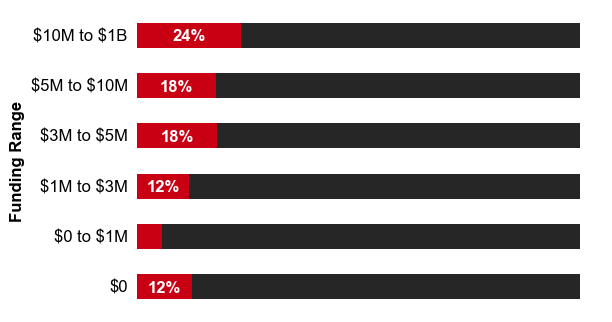

In [197]:
ax = temp.plot.barh(x = 'funding_category', stacked=True, color = [color1, color3], 
                    #edgecolor = "white", 
                    linewidth=2)

ax.legend().set_visible(False)

ax.set_facecolor('white')
ax.grid(b=False)

#ax.set_title("Positive vs Negative Exits by Category", main_font, fontweight = 'bold', fontsize = 12, position = [.5,1.05])
ax.set_ylabel("Funding Range", main_font, fontsize = 12, fontstyle = 'normal', fontweight = 'bold', color = graph_font_color)
ax.tick_params(axis='y', labelsize = 12)

ax.set_xlabel("", main_font, fontsize = 12, fontstyle = 'normal', fontweight = 'bold', color = graph_font_color)
ax.get_xaxis().set_visible(False)

ax.tick_params(axis='x', colors=graph_font_color)
ax.tick_params(axis='y', colors=graph_font_color)

for i, x in enumerate(temp.positive):
    ax.text(x = x/2, y = i-0.12, s = np.where(x>0.07, str(int(round(x*100, 0))) + '%', ''), ha='center', color = graph_font_color_2, fontsize = 12, fontstyle = 'normal', fontweight = 'bold')
    
if export_fig==True:
    plt.savefig(fig_path + 'ratio_positive_negative_by_funding_range.png', bbox_inches='tight', transparent=True)

Statistics of numerical features for companies in all categories

In [198]:
temp = all_data.copy()
temp = temp[['status', 'founded_at', 'board', 'employees', 'founders', 'milestones', 'funding_events', 'total_raised_to_date', 'last_raised_amount', 'top_vc_backed', 'tc_articles', 'companies_founded_previously']]

temp['exit'] = np.where(temp.status.isin(['acquired', 'ipo']), 'positive', 'negative')

#temp.head()

In [199]:
temp_positive = temp[temp.exit=='positive']
temp_positive = temp_positive.describe().transpose()
temp_positive = temp_positive[['mean', 'std', 'count']]
temp_positive = pd.concat({"Positive": pd.DataFrame(temp_positive)}, axis=1)

#temp_positive

In [200]:
temp_negative = temp[temp.exit=='negative']
temp_negative = temp_negative.describe().transpose()
temp_negative = temp_negative[['mean', 'std', 'count']]

temp_negative = pd.concat({"Negative": pd.DataFrame(temp_negative)}, axis=1)

#temp_negative

In [201]:
temp = temp_positive.join(temp_negative).round(2)

temp = temp.reindex(['employees', 'founders', 'board', 'milestones', 'funding_events', 'total_raised_to_date', 'last_raised_amount', 'top_vc_backed', 'tc_articles', 'companies_founded_previously'])

temp = temp.select(lambda x: x[1] in ['mean', 'count'], axis=1)

temp.to_clipboard()
temp

Positive            Negative         
                                    mean   count        mean    count
employees                           0.43  1718.0        0.44  14360.0
founders                            1.75  1354.0        1.58  10597.0
board                               0.46   182.0        0.27   1251.0
milestones                          0.61   943.0        1.04   5882.0
funding_events                      0.94  2074.0        0.79  14507.0
total_raised_to_date          6807577.66  2074.0  3044085.11  14507.0
last_raised_amount            4225260.81  2074.0  2194557.37  14507.0
top_vc_backed                       1.90  1827.0        1.11   9719.0
tc_articles                         0.09   943.0        0.05   5882.0
companies_founded_previously        0.86   217.0        0.82    997.0

Scatterplot matrix

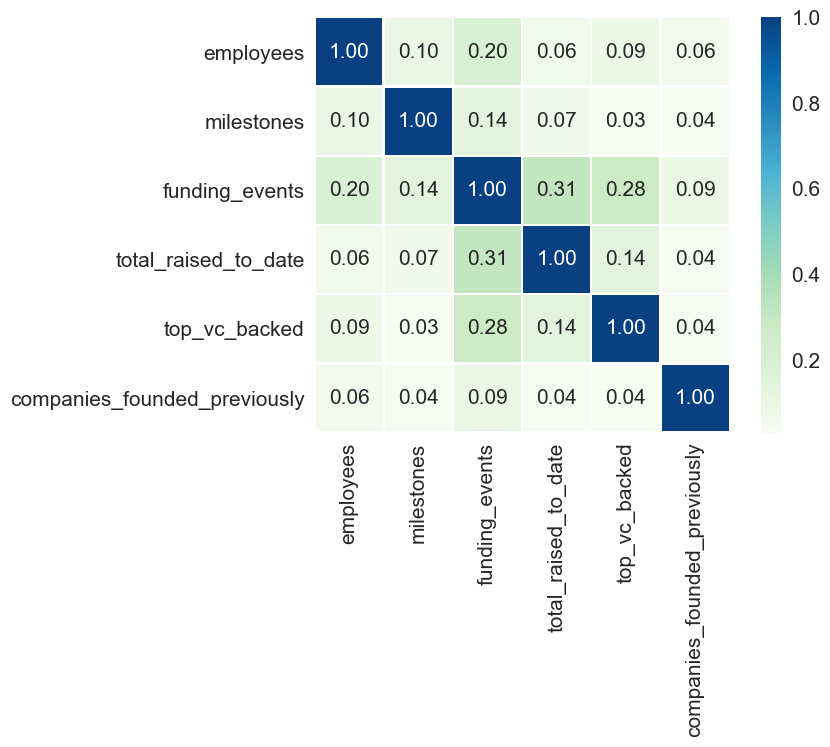

In [202]:
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

temp = all_data.copy()
temp.board.fillna(inplace=True, value=0)
temp.employees.fillna(inplace=True, value=0)
temp.founders.fillna(inplace=True, value=1)
temp.milestones.fillna(inplace=True, value=0)
temp.funding_events.fillna(inplace=True, value=0)
temp.total_raised_to_date.fillna(inplace=True, value=0)
temp.last_raised_amount.fillna(inplace=True, value=0)
temp.top_vc_backed.fillna(inplace=True, value=0)
temp.tc_articles.fillna(inplace=True, value=0)
temp.companies_founded_previously.fillna(inplace=True, value=0)

cols = ['employees', 'milestones', 'funding_events', 'total_raised_to_date', 'top_vc_backed', 'companies_founded_previously']

cm = np.corrcoef(temp[cols].values.T)

sns.set(font_scale=1.5)
hm = sns.heatmap(cm, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 15},
                 yticklabels=cols, 
                 xticklabels=cols, 
                 linecolor='white', 
                 linewidths=1, 
                 cmap = 'GnBu')

plt.show()

hm.tick_params(axis=u'both', which=u'both',length=0, colors = 'white')

if export_fig==True:
    hm.figure.savefig(fig_path + 'correlation_statistics.png', bbox_inches='tight', transparent=True)

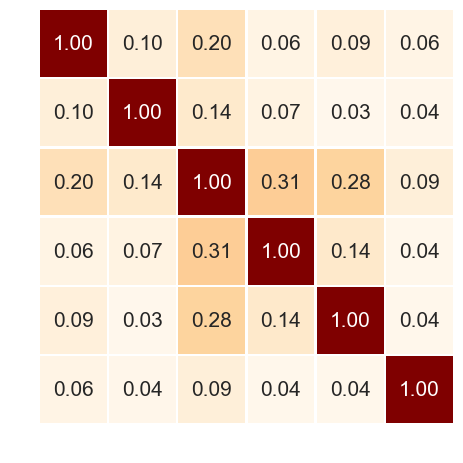

In [203]:
hm = sns.heatmap(cm, 
                 cbar=False, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 15},
                 linecolor='white', 
                 linewidths=1, 
                 cmap = 'OrRd')

hm.tick_params(axis=u'both', which ='both',length=0, colors = 'white')

if export_fig==True:
    hm.figure.savefig(fig_path + 'correlation_statistics.png', bbox_inches='tight', transparent=True)

## Machine Learning
### Data Preparation
The majority of machine learning algorithms I intend to apply require complete data (i.e. no missing data). 
Simply removing companies with incomplete data will leave us with less than 10,000 samples (the arbitrary rule) and also a biased sample since data is unlikely to be missing at random. 
We can however make some simplifying  assumptions for missing data in our features. 

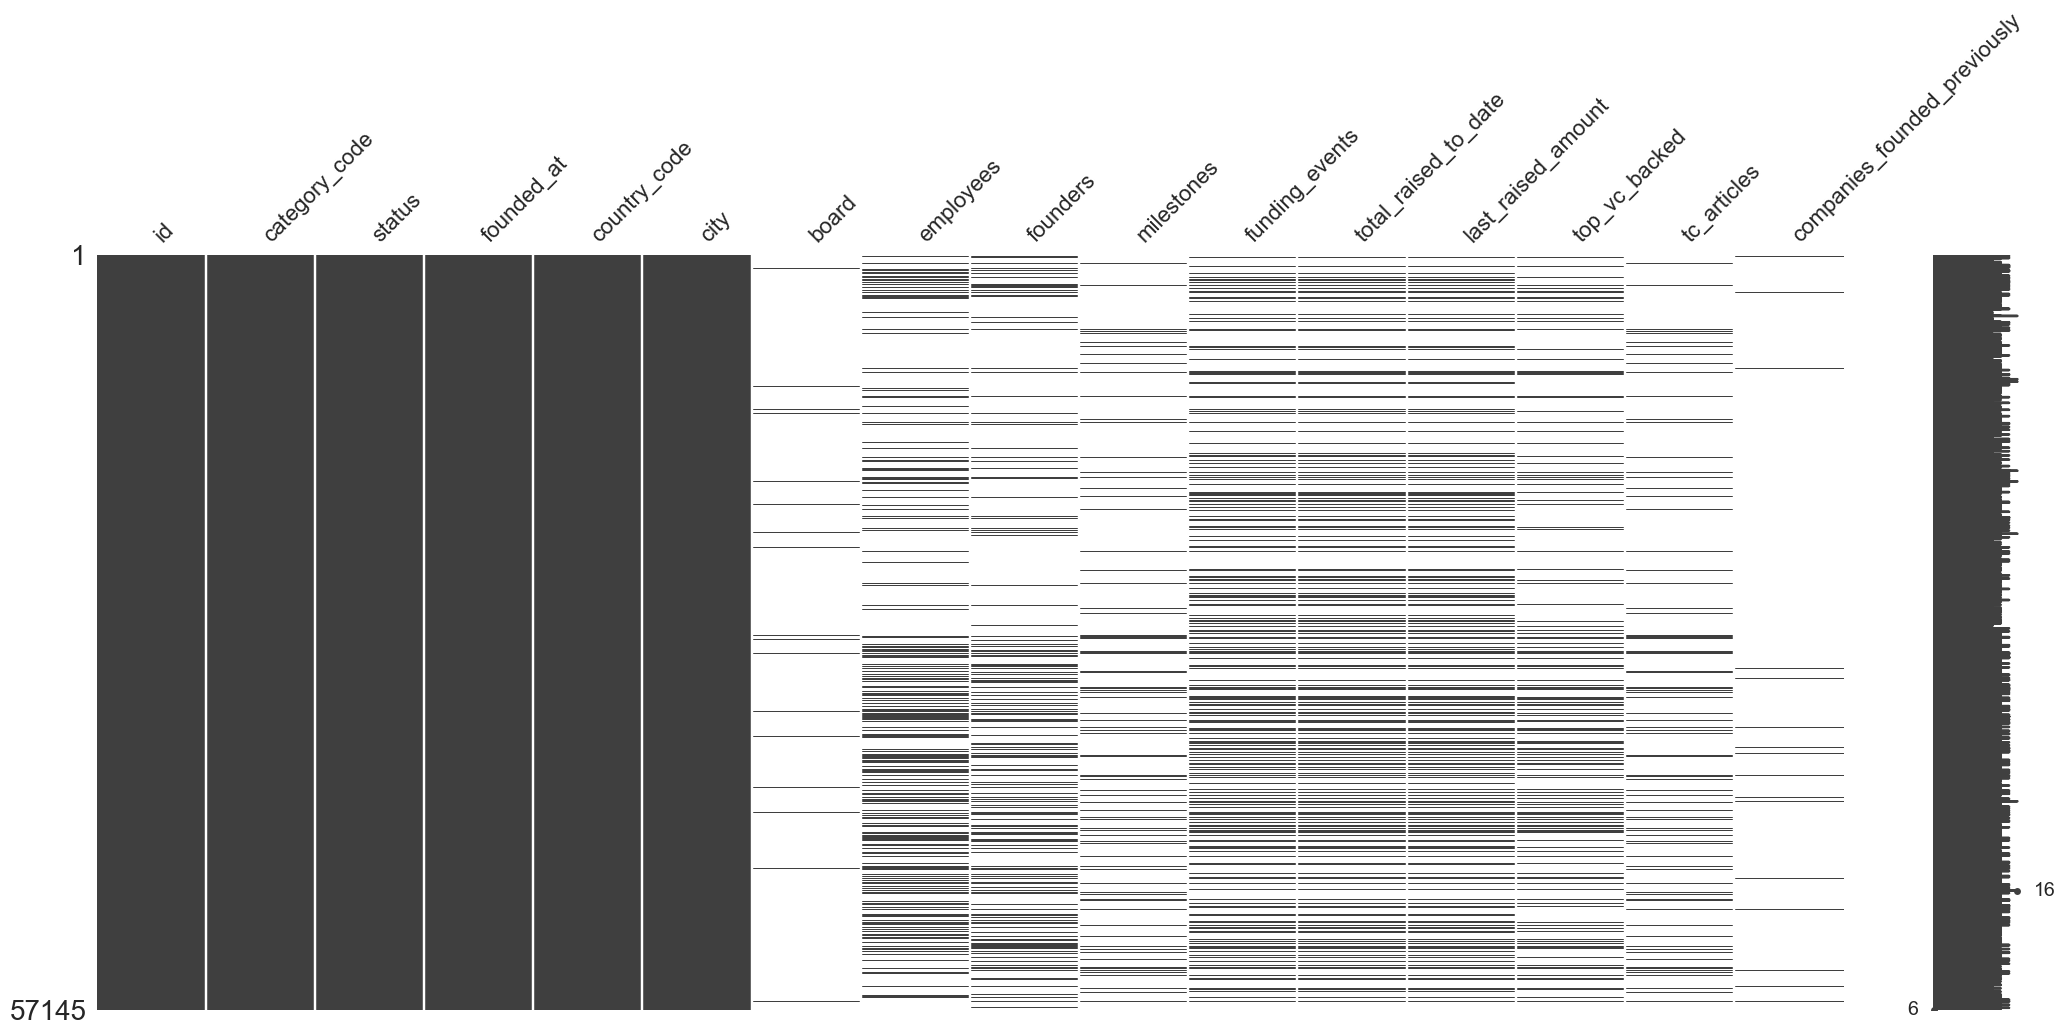

In [204]:
msno.matrix(all_data, freq=False)

#plt.savefig(fig_path + 'missing_data.png', bbox_inches='tight')
#plt.close()

Since CrunchBase consists largely of self-reported data, the missing data phenomenon is not surprising. As is it is a fairly popular source for data on startups, similar to how LinkedIn is the first source of information people will turn to for information on professional contacts, I assume there is significant motivation for founders to fill in data where available and keep that data up to date. Therefore, any missing data should indicate the presence of a 0. For example, if a company did not report any funding, we will assume that this company raised $0. We can make similar assumptions for the other variables. 

In [205]:
all_data.board.fillna(inplace=True, value=0)
all_data.employees.fillna(inplace=True, value=0)
all_data.founders.fillna(inplace=True, value=0)
all_data.milestones.fillna(inplace=True, value=0)
all_data.funding_events.fillna(inplace=True, value=0)
all_data.total_raised_to_date.fillna(inplace=True, value=0)
all_data.last_raised_amount.fillna(inplace=True, value=0)
all_data.top_vc_backed.fillna(inplace=True, value=0)
all_data.tc_articles.fillna(inplace=True, value=0)
all_data.companies_founded_previously.fillna(inplace=True, value=0)

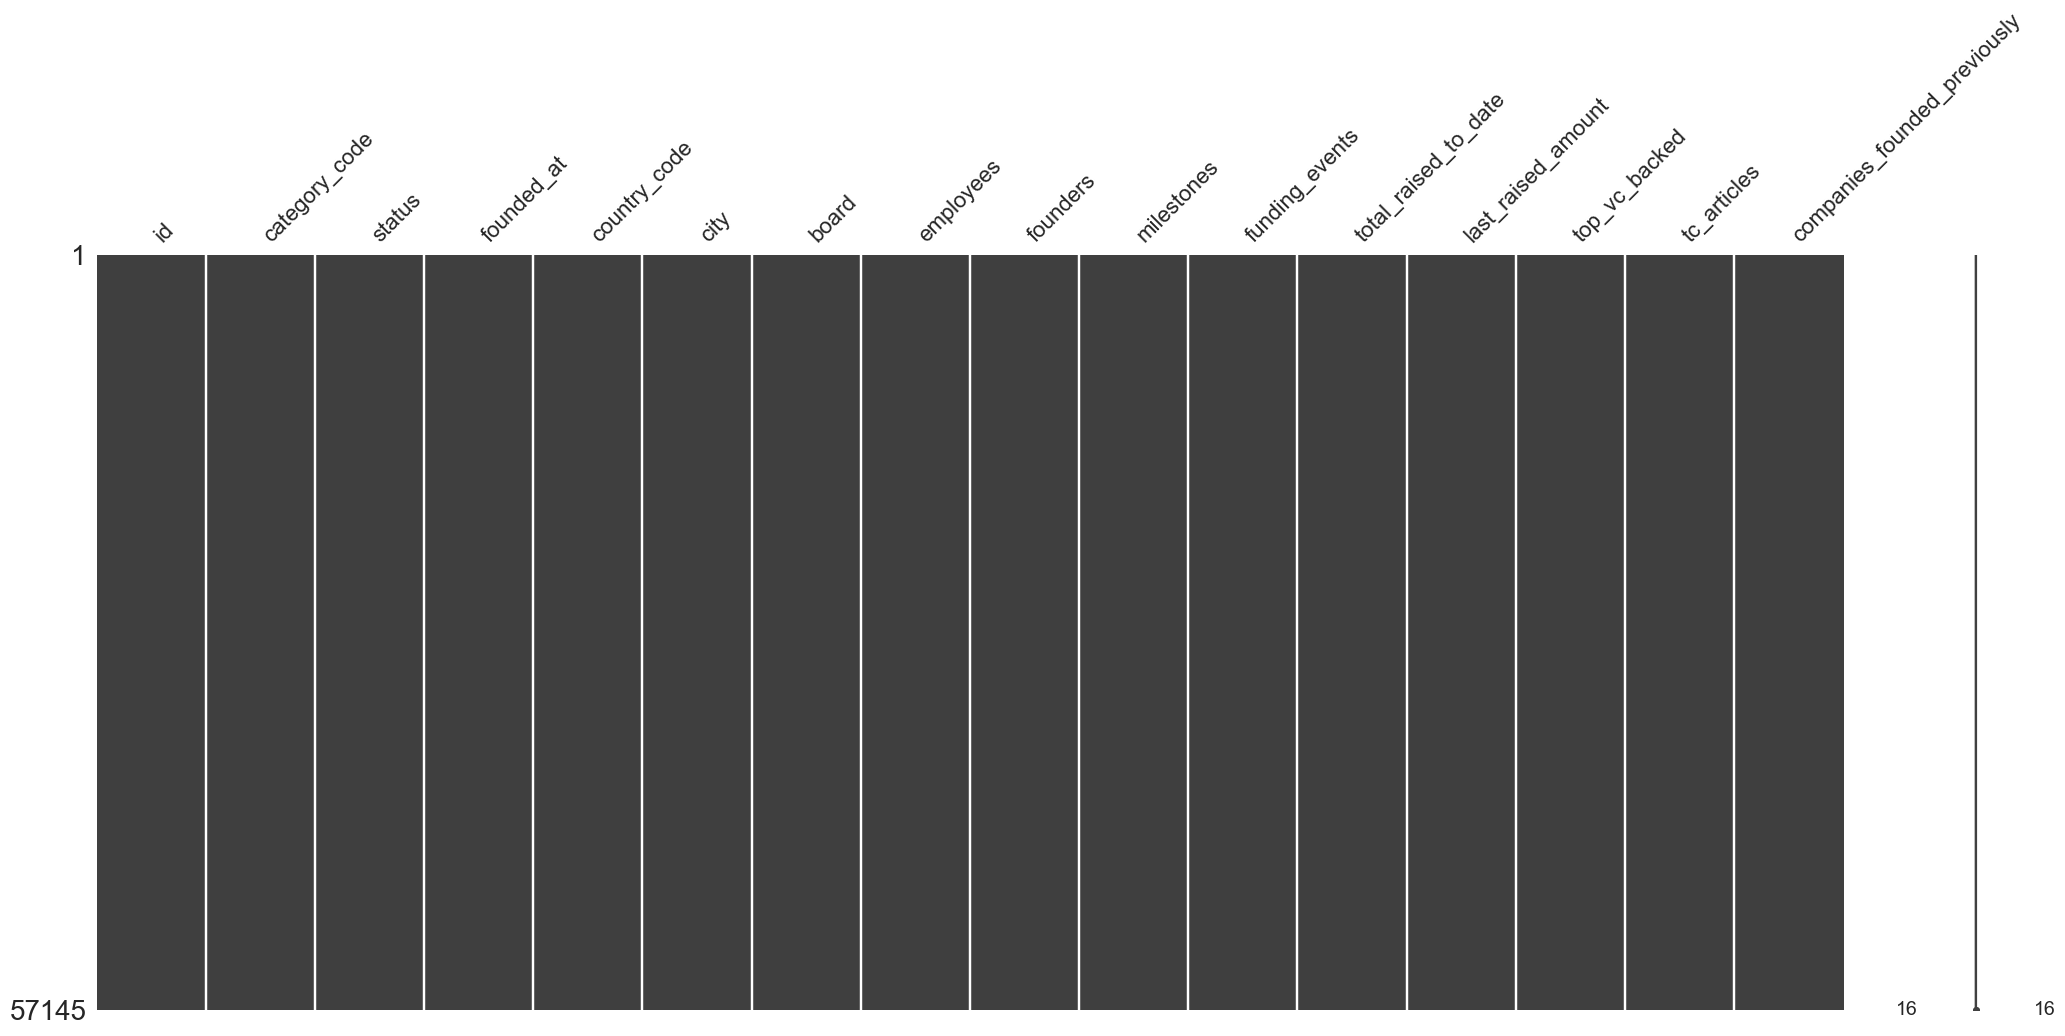

In [206]:
msno.matrix(all_data, freq=False)

plt.savefig(fig_path + 'missing_data_filled.png', bbox_inches='tight')
plt.close()

Next, let's dummify the cardinal categorical variables.

In [207]:
from sklearn.preprocessing import StandardScaler

all_data['founded_at'] = all_data.founded_at.dt.year

columns = ['category_code', 'country_code', 'city']

for column in columns: 
    dum = pd.get_dummies(all_data[column], prefix = column, dummy_na=False)
    all_data = pd.concat([all_data, dum], axis = 1)
    all_data = all_data.drop(column, axis = 1)

all_data.head()

,id,status,founded_at,board,employees,founders,milestones,funding_events,total_raised_to_date,last_raised_amount,top_vc_backed,tc_articles,companies_founded_previously,category_code_advertising,category_code_analytics,category_code_automotive,category_code_biotech,category_code_cleantech,category_code_consulting,category_code_design,category_code_ecommerce,category_code_education,category_code_enterprise,category_code_fashion,category_code_finance,category_code_games_video,category_code_government,category_code_hardware,category_code_health,category_code_hospitality,category_code_legal,category_code_local,category_code_manufacturing,category_code_medical,category_code_messaging,category_code_mobile,category_code_music,category_code_nanotech,category_code_network_hosting,category_code_news,category_code_nonprofit,category_code_other,category_code_pets,category_code_photo_video,category_code_public_relations,category_code_real_estate,category_code_search,category_code_security,category_code_semiconductor,category_code_social,category_code_software,category_code_sports,category_code_transportation,category_code_travel,category_code_web,country_code_AUS,country_code_CAN,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_Small_startup_country,country_code_USA,country_code_Unknown_country,city_Amsterdam,city_Austin,city_Bangalore,city_Berlin,city_Boston,city_Chicago,city_London,city_Los Angeles,city_Montreal,city_Moscow,city_New York City,city_Paris,city_Sao Paulo,city_Seattle,city_Silicon Valley,city_Singapore,city_Small_startup_city,city_Sydney,city_Tel Aviv,city_Toronto,city_Unknown_city,city_Vancouver
0,c:1,operating,2005,1.0,0.0,2.0,0.0,3.0,39750000.0,25000000.0,2.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,c:10000,operating,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,c:10001,operating,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,c:10002,operating,2007,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,c:10003,operating,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Next, let's split the data into training and testing samples. 

In [208]:
all_data = all_data[all_data.status.isin(['operating', 'acquired', 'ipo', 'closed'])]
len(all_data)

57145

Seperate our x and y variables.

In [209]:
x = all_data.drop(['status', 'id'], axis = 1)
y = ((all_data.status == 'acquired') | (all_data.status == 'ipo')).values.astype(np.int)

Split our data ito training and testing sets. 

In [210]:
from sklearn.cross_validation import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 2)

print("Training X samples:", xtrain.shape[0])
print("Training Y samples:", ytrain.shape[0])
print()
print("Testing X samples:", xtest.shape[0])
print("Testing Y samples:", ytest.shape[0])

Training X samples: 40001
Training Y samples: 40001

Testing X samples: 17144
Testing Y samples: 17144


In [211]:
sc = StandardScaler()

xtrain_std = sc.fit_transform(xtrain)
xtest_std = sc.transform(xtest)

print("Training X standardised samples:", xtrain_std.shape[0])
print("Testing X standardised samples:", xtest_std.shape[0])

Training X standardised samples: 40001
Testing X standardised samples: 17144


To address the imbalance of classes in our dataset, we will use SMOTE (Syntheic Minority Over-sampling Technique). As its name suggests, SMOTE is an oversampling method and  works by creating synthetic samples from the minor class instead of creating copies. The algorithm selects two or more similar instances (using a distance measure) and perturbing an instance one attribute at a time by a random amount within the difference to the neighboring instances. To learn more about SMOTE, see [SMOTE: Synthetic Minority Over-sampling Technique (2002)](https://www.jair.org/media/953/live-953-2037-jair.pdf).

In [212]:
from imblearn.over_sampling import SMOTE

# Apply regular SMOTE
smote = SMOTE(kind='regular')

xtrain_resampled, ytrain_resampled = smote.fit_sample(xtrain, ytrain)

# Standardised resampled data
xtrain_resampled_std = sc.fit_transform(xtrain_resampled)

print("Minority class: ", str(smote.min_c_))
print("Majority class: ", str(smote.maj_c_))
print("Occurrences of each class: ", str(smote.stats_c_))
print("")
print("Shape of original X: ", str(smote.X_shape_))
print("Shape of resampled X: ", str(xtrain_resampled.shape))

Minority class:  1
Majority class:  0
Occurrences of each class:  Counter({0: 37230, 1: 2771})

Shape of original X:  (40001, 86)
Shape of resampled X:  (74460, 86)


In [213]:
# Something else we can do is random undersampling of the majority class to get a balanced data set

from imblearn.under_sampling import RandomUnderSampler 
from collections import Counter

rus = RandomUnderSampler(random_state = 1)
#xtrain_resampled, ytrain_resampled = rus.fit_sample(xtrain, ytrain)

# Standardised resampled data
#xtrain_resampled_std = sc.fit_transform(xtrain_resampled)

#print('Resampled dataset shape {}'.format(Counter(ytrain_resampled)))

We'll need to develop some pipelines when we find successful models. 

In [214]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imblearn_Pipeline

Now let's set up some custom functions for selecting the best combination of parameters through cross validation. Note that for cross validation purposes, we will use the precision score to select the best combination of parameters. This is because we want to keep the number of false positives we get back as low as possible. We do not expect to get a high recall (i.e. identify as many positive exits as possible) as this is difficult for even human investors but we do expect to be able to more accurately identify positive exits (relative to human investors). 

In [215]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform_rand

from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

scorer = make_scorer(precision_score, pos_label=1)
#scorer = make_scorer(recall_score, pos_label=1)
#scorer = make_scorer(f1_score, pos_label=1)

Create a function to easily plot a confusion matrix. 

In [216]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        cm = cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)

In [217]:
from sklearn.metrics import confusion_matrix

def custom_confusion_matrix(clf, 
                            x_data = xtest, 
                            y_data = ytest, 
                            normalize = False,
                            deck = False):

    y_true = y_data
    y_pred = clf.predict(x_data)

    # confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    TP = cm[1][1]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[0][0]

    Precision = TP / (TP + FP)
    Specificity = TN / (TN + FP)
    Recall = TP / (TP + FN)
    F1 = 2*((Precision*Recall)/(Precision+Recall))

    # Plot
    if deck==False: 
        plt.figure()
        plot_confusion_matrix(cm, classes=[0,1], title='', normalize = normalize)
        plt.show()
        
        print("TP = {}".format(TP))
        print("FP = {}".format(FP))
        print("TN = {}".format(TN))
        print("FN = {}".format(FN))
        print(" ")
        print('Precision ( or TPR) = {}'.format(round(Precision, 2)))
        print('Specificity ( or TNR) = {}'.format(round(Specificity, 2)))
        print('Recall = {}'.format(round(Recall, 2)))
        print('F1 = {}'.format(round(F1 , 2)))
    
    if deck==True: 
        plt.figure()
        plot_confusion_matrix(cm, classes=[0,1], title='', normalize = normalize)
        plt.tick_params(axis=u'both', which=u'both',length=0, colors = 'white')
        plt.ylabel('True label', color = 'white')
        plt.xlabel('Predicted label', color = 'white')
        plt.savefig(fig_path + str(clf)[:20] + '_cm.png', bbox_inches='tight', transparent=True)
        plt.close()

A function to plot precision-recall curve. 

In [218]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve

def scorePrimitive(classifier, input, result):
    predictions = classifier.predict(input)
    (precision, recall, fscore, threshold) = precision_recall_fscore_support(result, predictions, average='micro')
    print('Precision: %0.2f ; Recall: %0.2f ; F-Score: %0.2f' % (precision, recall, fscore))
    num_true_positives = 0
    num_true_negatives = 0
    num_false_positives = 0
    num_false_negatives = 0
    
    for i, prediction in enumerate(predictions):
        if prediction == 0:
            if result[i] == 0:
                num_true_negatives += 1
            else:
                num_false_negatives += 1
        else:
            if result[i] == 1:
                num_true_positives += 1
            else:
                num_false_positives += 1
        
        print('Num True Positives: ', num_true_positives)
        print('Num False Positives: ', num_false_positives)
        print('Num True Negatives: ', num_true_negatives)
        print('Num False Negatives: ', num_false_negatives)


def score(classifier, input, result, title):
    #print('For %s' % title)
    predictions = classifier.predict_proba(input)
    precision, recall, thresholds = precision_recall_curve(result, predictions[:, 1])
    area = auc(recall, precision)
    #print("Area Under Curve for %s: %0.2f" % (title, area))
    
    plt.clf()
    plt.plot(recall, precision, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('%s AUC=%0.2f' % (title, area))
    plt.legend(loc="upper right")
    plt.show()
    #scorePrimitive(classifier, input, result)

A function to plot an ROC (TPR vs TNR) curve. 

In [219]:
from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

def custom_roc(clf, x, y):
    
    classifier = clf

    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)

    lw = 2
 
    probas_ = classifier.predict_proba(x)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y, probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color='blue',
             label='ROC (area = %0.2f)' % roc_auc)
    
    plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
             label='Luck')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

That's it. We're done! 
Now for some machine learning.

### Naive Bayes

We'll start with the Naive Bayes algorithm. 

Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem. The 'naive' part of the name comes from the strong (ergo naive) independence assumptions between the features. In reality, we see that features are often correlated. 

Despite this assumption, Naive Bayes algoithms have been applied successfully in various domains. With appropriate pre-processing, they have been found to be with much more sophisticated methods (some of which we will see later on in this notebook).

The following models are available to us through scikit:
* Gaussian naive Bayes
* Multinomial naive Bayes
* Bernoulli naive Bayes

Each makes different assumptions about the distribution of the underlying data. As most of our features exhibit a strong skew to the right, a multinomial naive bayes model is likely to work best for this classification task.  

In [220]:
from sklearn.naive_bayes import MultinomialNB

There is one hyperparameter that we can tune for Multinomial Naive Bayes model. This is the laplace smoothing constant. This is ensure that no feature has a probability of 0 which becomes problematic because of the naive Bayes independence assumption. 

In [221]:
# prepare a range of alpha values to test
parameters = np.array([.1, 1, 5, 10, 50, 100, 1000])

# create and fit a MNB model, testing each alpha
grid = GridSearchCV(estimator = MultinomialNB(), 
                    param_grid = dict(alpha = parameters), 
                    scoring = scorer,
                    cv = 5)

grid = grid.fit(xtrain, ytrain)

# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.173191877094
0.1


Fit model with the best parameters. 

In [222]:
mnb = MultinomialNB(alpha = grid.best_estimator_.alpha)
mnb.fit(xtrain, ytrain)

MultinomialNB(alpha=0.10000000000000001, class_prior=None, fit_prior=True)

Excellent, now let's see our overall accuracy rate. 

In [223]:
print ("MN Overall Accuracy: %0.2f%%" % (100 * mnb.score(xtest, ytest)))

MN Overall Accuracy: 91.26%


We're seeing what's look like a very impressive overall accuracy rate with our model!  

Unfortunately, this would be falling prey to what is known as the accuracy paradox.  
It is the case where your accuracy measures tell the story that you have excellent accuracy but in fact, the accuracy is only reflecting the underlying class' distribution.  More specifically, the reason we get such a high accuracy rate overall on an imbalanced dataset like ours is because our model looks at the data and cleverly decides that the best thing to do is to always predict “Class 0” and thus achieve high accuracy.  

Instead, what we should really be looking at are the true postive, false positive, true negative and false negative rates. A confusion matrix is a really helpful way for breaking down predictions into a table showing correct predictions (the diagonal) and the types of incorrect predictions made (what classes incorrect predictions were assigned to). Let's try to make one below. 

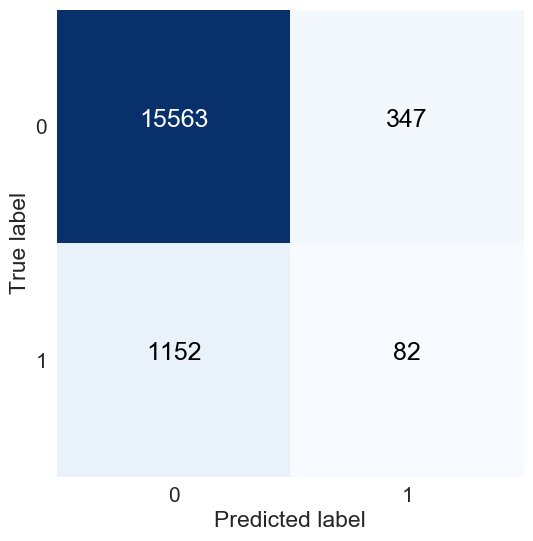

TP = 82
FP = 347
TN = 15563
FN = 1152
 
Precision ( or TPR) = 0.19
Specificity ( or TNR) = 0.98
Recall = 0.07
F1 = 0.1


In [224]:
custom_confusion_matrix(clf = mnb, x_data = xtest, y_data = ytest)

So now, we're starting to get a clearer picture of the performance of our model and its not looking good.  

While the model does a fairly good job of predicting 0s (non-acquired/non-ipo companies), we do a very poor job of predicting 1s (acquired/ipo companies) and this is what we really care about. We only get those right about 19% of the time. Let's take a look at some other evaluation measures. 

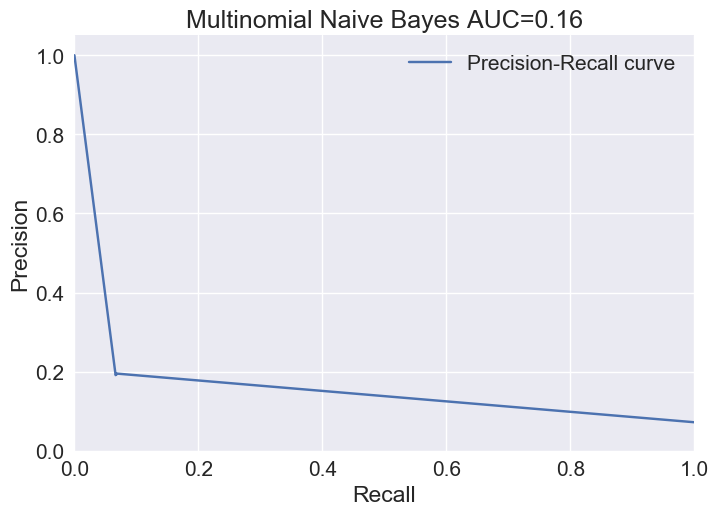

In [225]:
score(mnb, xtest, ytest, 'Multinomial Naive Bayes')

A high area under the curve would represent both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall). In our case, you can see the precision and recall are both pretty poor across the range of threshold values.  

Let's take a look at one other evaluation measure, the ROC curve. 

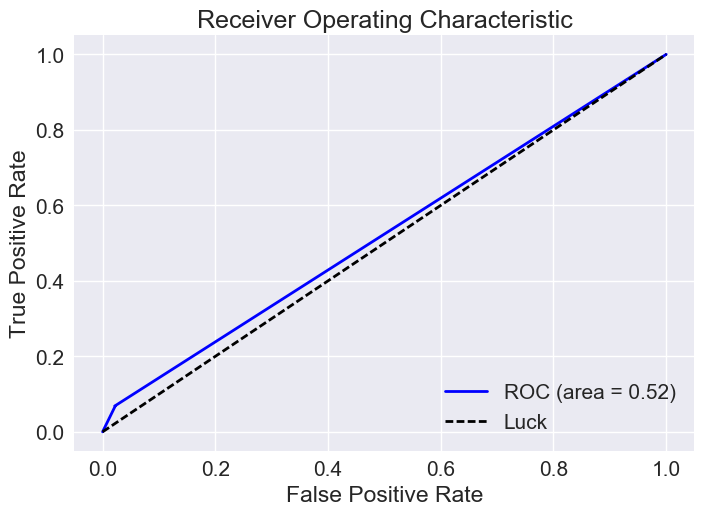

In [226]:
custom_roc(clf = mnb, x = xtest, y = ytest)

Once again, you can see that this model does not do very well and in fact it does about as well as flipping a coin would. 

### Naive Bayes with resampled data

Let's try again with our resampled data which balances out the two classes in our dataset.  

In addition, we're also only going to use a subset of the features. This is because it is known that performance of Naive Bayes models suffer in domains that involve correlated features.  

*Naïve Bayes can suffer from oversensitivity to redundant and/or irrelevant attributes. If two or more attributes are highly correlated, they receive too much weight in the final decision as to which class an example belongs to. This leads to a decline in accuracy of prediction in domains with correlated features.* - Chotirat “Ann” Ratanamahatana Dimitrios Gunopulos at http://alumni.cs.ucr.edu/~ratana/DCAP02.pdf

In [227]:
class ColumnSelector(object):
    """
    A feature selector for scikit-learn's Pipeline class that returns
    specified columns from a numpy array.

    """

    def __init__(self, cols):
        self.cols = cols

    def transform(self, X, y=None):
        #if (type(self) is pd.core.frame.DataFrame):
        if isinstance(X, pd.DataFrame):
            X = X.as_matrix()[:, self.cols]
        else: 
            X = X[:, self.cols]
        return X

    def fit(self, X, y=None):
        return self

In [228]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(xtrain_resampled, ytrain_resampled)

selections = rf.feature_importances_ > 0.05

cs = ColumnSelector(cols = selections)
temp_xtrain = cs.transform(xtrain_resampled)
temp_xtest = cs.transform(xtest)

There are is one hyperparameter that we can tune for Multinomial Naive Bayes model. This is the laplace smoothing parameter. This is simply to ensure that no feature has a probability of 0 as this can be quite problematic in a Naive Bayes model.  
Consider the worst case scenario where none of the features in the training sample appear in the test data. In this case, under your model we would conclude that the data is impossible but it clearly exists, creating a contradiction. 

In [229]:
# prepare a range of alpha values to test
parameters = np.array([.1, 1, 5, 10, 50, 100, 1000])

# create and fit a MNB model, testing each alpha
grid = GridSearchCV(estimator = MultinomialNB(), 
                    param_grid = dict(alpha = parameters), 
                    cv = 5,
                    scoring = scorer)

grid = grid.fit(temp_xtrain, ytrain_resampled)

# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.703513267108
1000.0


Fit model with best parameters. 

In [230]:
mnb = MultinomialNB(alpha = grid.best_estimator_.alpha)
mnb.fit(temp_xtrain, ytrain_resampled)

MultinomialNB(alpha=1000.0, class_prior=None, fit_prior=True)

Let's see the overall accuracy we're getting this time round. 

In [231]:
print ("MN Overall Accuracy: %0.2f%%" % (100 * mnb.score(temp_xtest, ytest)))

MN Overall Accuracy: 81.82%


We get worse overall performance on this model but as we've said before, this does not tell the whole story.  

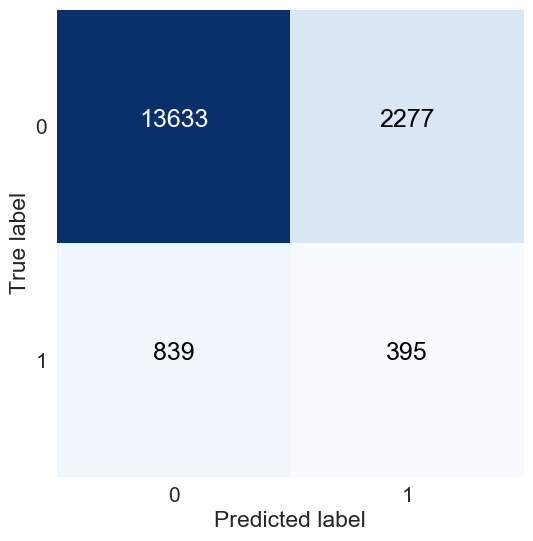

TP = 395
FP = 2277
TN = 13633
FN = 839
 
Precision ( or TPR) = 0.15
Specificity ( or TNR) = 0.86
Recall = 0.32
F1 = 0.2


In [232]:
custom_confusion_matrix(clf = mnb, x_data = temp_xtest, y_data = ytest)

In [233]:
custom_confusion_matrix(clf = mnb, x_data = temp_xtest, y_data = ytest, deck=True)

Although our precision and recall have decreased, we get a significantly better recall rate.  
Lets check some of our other evaluation measures. 

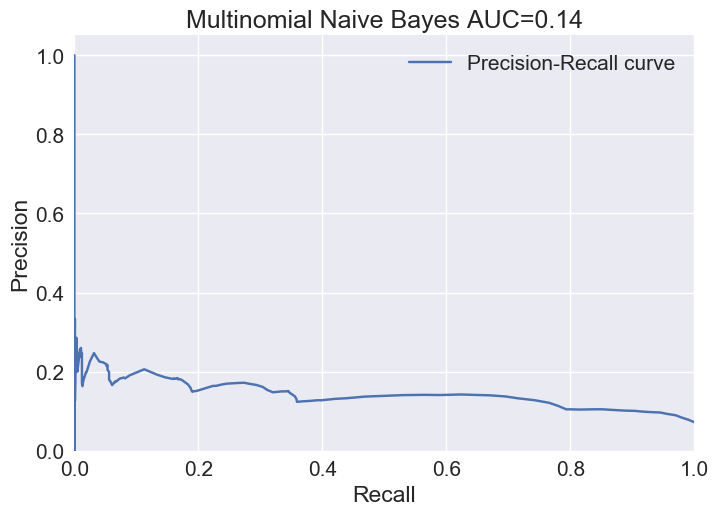

In [234]:
score(mnb, temp_xtest, ytest, 'Multinomial Naive Bayes')

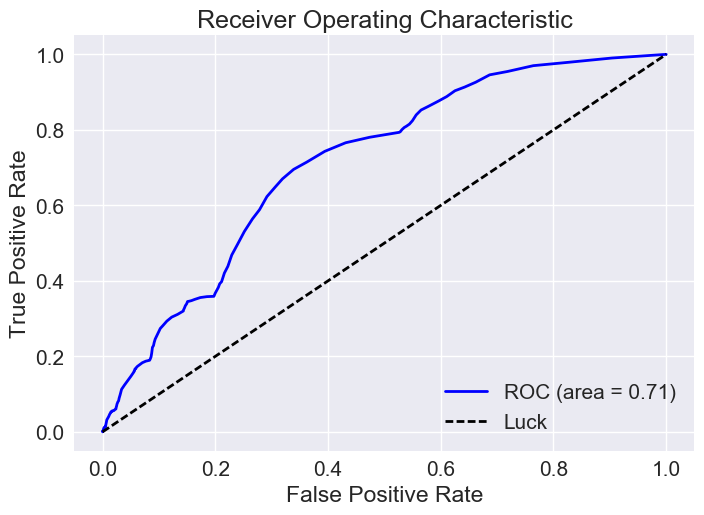

In [235]:
custom_roc(clf = mnb, x = temp_xtest, y = ytest)

Overall, it appears that we have a slightly better performing model this time round.  
Lets create a pipeline which we'll use later on to create an ensemble voting classifier model. 

In [236]:
pipeline_mnb = imblearn_Pipeline([('smote', smote),
                                  ('sel', ColumnSelector(selections)), # use only selected features
                                  ('mnb', mnb)])

pipeline_mnb

Pipeline(steps=[('smote', SMOTE(k=None, k_neighbors=5, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=None, ratio='auto', svm_estimator=None)), ('sel', <__main__.ColumnSelector object at 0x0000003587A70860>), ('mnb', MultinomialNB(alpha=1000.0, class_prior=None, fit_prior=True))])

### K Nearest Neighbours

K Nearest Neighbours (more commonly referred to as kNN) is an algorithm starts off with a training dataset made up of examples that are classified into several categories. For each record in the test dataset, kNN identifies k records in the training data that are the "nearest" in similarity. This unlabeled test record is then assigned to the class of the majority of the k nearest neighbors. 

Its an extremely simple and sometimes effective algorithm. In addition, unlike multinomial naive bayes it makes absolutely no assumptions about the underlying data distribution. 

On the downside however, it doesn't produce a model, the prediction stage is extremely slow and it requires a large amount of memory (depending on the size of the training data). Furthermore, KNN is extremely susceptible to the curse of dimensionality.  

So let's try KNN.  

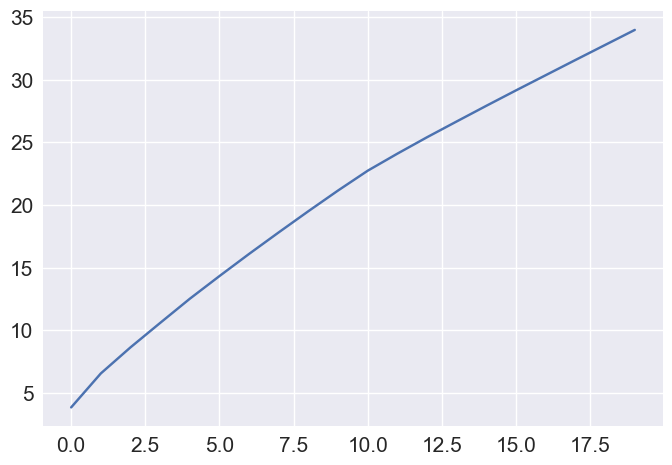

In [237]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 20)

pca.fit(xtrain_std)

# The amount of variance that each PC explains
var = pca.explained_variance_ratio_

# Cumulative Variance explained
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

#print(var1)
plt.plot(var1)

Looking at the above plot, we see that we only need the first 100 principal components to explain 70% of the variance in our data.  
Let's grab those and create a new dataset. Note that we do not use resampled data because it really doesn't matter how imbalanced the dataset is for kNN. 

In [238]:
pca = PCA(n_components = 20)

pca.fit(xtrain_std)

xtrain_pca = pca.transform(xtrain_std)
xtest_pca = pca.transform(xtest_std)

There are several hyperparameters one can tune for this particular implementation of the KNN algorithm.  

* The number of neighbours is essentially the number of the most similar samples used to predict the class of each test sample.  
* The weights used refers to the weight function used in prediction. Possible values are:
 * ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
 * ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
 * [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.  
* The metric hyperparameter refers to the distance metric used.  
* The algorithm parameter refers to the algorithm used to compute the nearest neighbors: 
 * ‘ball_tree’ will use BallTree
 * ‘kd_tree’ will use KDTree
 * ‘brute’ will use a brute-force search

In [239]:
from sklearn.neighbors import KNeighborsClassifier

if tuning==True:    

    # prepare a range of parameter values to test
    parameters = {'n_neighbors' : sp_randint(1, 200),
                  'weights': ['uniform', 'distance'],
                  'metric': ['minkowski', 'euclidean'
                            #, 'manhattan', 'chebyshev', 'wminkowski', 'seuclidean', 'mahalanobis'
                            ], 
                  'leaf_size': sp_randint(1, 100), 
                  'algorithm': ['ball_tree', 'kd_tree']}

    # create and fit a decision tree, testing each parameter with random samples
    grid = RandomizedSearchCV(estimator = KNeighborsClassifier(n_jobs=2), 
                              param_distributions = parameters,
                              scoring = scorer,
                              cv = 5,
                              n_iter = 200)

    grid = grid.fit(xtrain_pca, ytrain)

    # summarize the results of the grid search
    print('Best score', str(round(grid.best_score_))) #0.25
    print(grid.best_params_)

Fit model with best parameters. 

In [240]:
if tuning==True:

    knn = KNeighborsClassifier(**grid.best_params_)

if tuning==False:
    
    # For max overall score
    #knn = KNeighborsClassifier(metric = 'euclidean', 
    #                           algorithm = 'kd_tree', 
    #                           n_neighbors = 13, 
    #                           leaf_size = 76, 
    #                           weights = 'distance',
    #                           n_jobs = 2)
    
    # For max precision
    knn = KNeighborsClassifier(leaf_size = 59, 
                               n_neighbors = 10, 
                               weights = 'uniform', 
                               algorithm = 'ball_tree', 
                               metric = 'minkowski',
                               n_jobs = 2)

knn.fit(xtrain_pca, ytrain)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=59, metric='minkowski',
           metric_params=None, n_jobs=2, n_neighbors=10, p=2,
           weights='uniform')

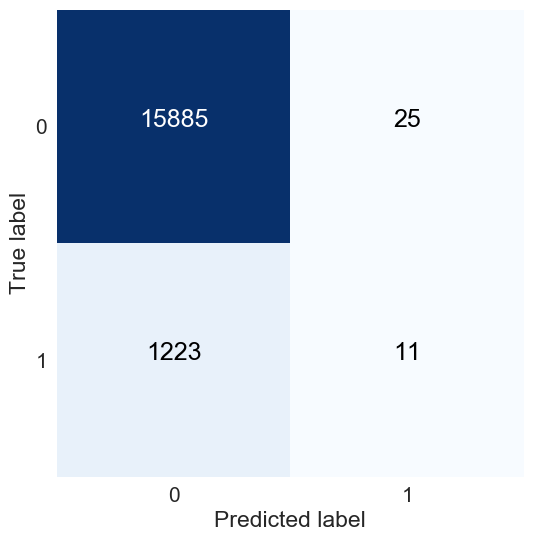

TP = 11
FP = 25
TN = 15885
FN = 1223
 
Precision ( or TPR) = 0.31
Specificity ( or TNR) = 1.0
Recall = 0.01
F1 = 0.02


In [241]:
custom_confusion_matrix(clf = knn, x_data = xtest_pca, y_data = ytest)

In [242]:
#score(knn, temp_xtest, ytest, 'k Nearest Neighbours')
#knn does not have a predict_proba method, obviously

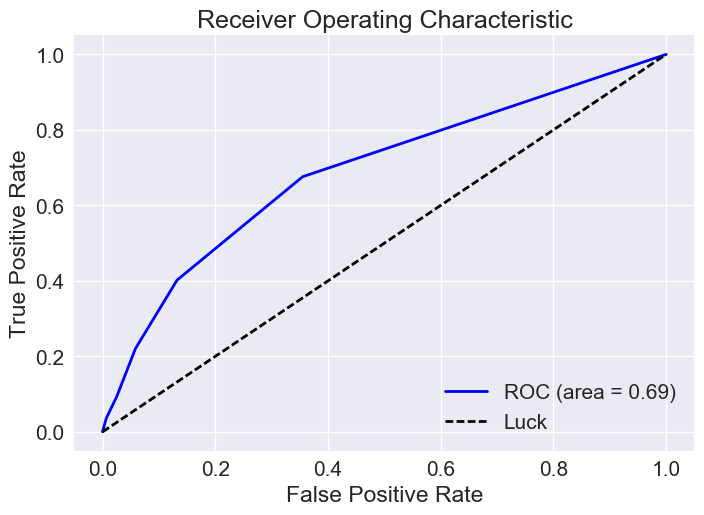

In [243]:
custom_roc(clf = knn, x = xtest_pca, y = ytest)

This seems like an acceptable model.  
Lets create a pipeline which we'll use later on to create an ensemble voting classifier model. 

In [244]:
pipeline_knn = imblearn_Pipeline([('sc', sc), ('pca_knn', PCA(n_components = 20)), ('knn', knn)])

pipeline_knn

Pipeline(steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca_knn', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('knn', KNeighborsClassifier(algorithm='ball_tree', leaf_size=59, metric='minkowski',
           metric_params=None, n_jobs=2, n_neighbors=10, p=2,
           weights='uniform'))])

### SVM

Linear classifiers (SVM, logistic regression, a.o.) with SGD training.

This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). 


In [245]:
from sklearn.linear_model import SGDClassifier

SVM models require a lot of computing power for high dimensional data. We will reduce the dimensionality of our data by simply extracting the principal components. 

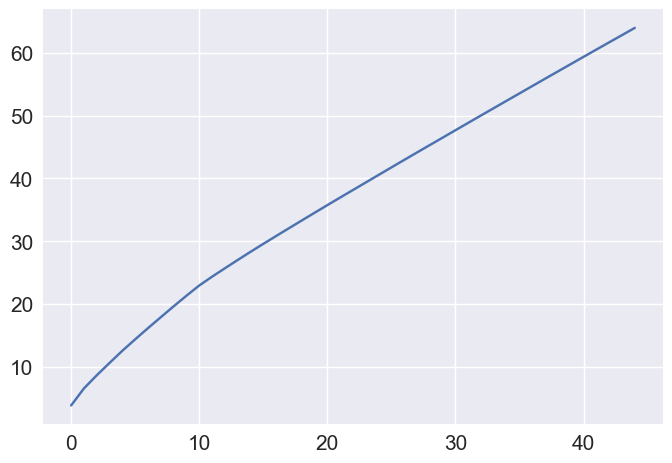

In [246]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 45)

pca.fit(xtrain_std)

# The amount of variance that each PC explains
var = pca.explained_variance_ratio_

# Cumulative Variance explained
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

#print(var1)
plt.plot(var1)

Looking at the above plot, we see that we only need the first 100 principal components to explain 70% of the variance in our data.  
Let's grab those and create a new dataset. 

In [247]:
pca = PCA(n_components = 45)

pca.fit(xtrain_resampled_std)

xtrain_resampled_pca = pca.transform(xtrain_resampled_std)
xtest_pca = pca.transform(xtest_std)

There are several hyperparameters one can tune for this particular implementation of the SVM algorithm.  

 * We set the loss function to ‘hinge’ which gives us a linear SVM.  
 * The penalty (aka regularization term) is added to the loss function that shrinks model parameters towards zero.  
 * Class weight refers to the weights associated with our 2 classes. If not given, both classes are given a weight of one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data. 

In [248]:
if tuning==True:

    # prepare a range of parameter values to test
    parameters = {'loss': ['hinge'], #['log', 'modified_huber', 'squared_hinge', 'perceptron'],
                  'penalty': ['none', 'l2', 'l1', 'elasticnet'], 
                  'learning_rate': ['constant', 'optimal', 'invscaling'],
                  'class_weight': ['balanced', None], 
                  'eta0': sp_uniform_rand(0, 1)}

    # create and fit a decision tree, testing each parameter with random samples
    grid = RandomizedSearchCV(estimator = SGDClassifier(n_jobs=2, random_state = 0), 
                              param_distributions = parameters,
                              scoring = scorer,
                              cv = 5,
                              n_iter = 200)

    grid = grid.fit(xtrain_resampled_pca, ytrain_resampled)

    # summarize the results of the grid search
    print('Best score', str(round(grid.best_score_, 2)))
    print(grid.best_params_)

Fit model with best parameters. 

In [249]:
if tuning==True:

    svm = SGDClassifier(**grid.best_params_)
    
if tuning==False:
    
    # For max overall score
    #svm = SGDClassifier(learning_rate = 'invscaling', 
    #                    loss = 'hinge', 
    #                    penalty = 'l2',
    #                    class_weight =  None, 
    #                    eta0 = 0.93888080985266731)
    
    # For max precision
    svm = SGDClassifier(learning_rate = 'invscaling', 
                        loss = 'hinge', 
                        penalty = 'none',
                        class_weight = 'balanced', 
                        eta0 = 0.52323079051731769, 
                        random_state = 0)
    
svm.fit(xtrain_resampled_pca, ytrain_resampled)

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.5232307905173177, fit_intercept=True,
       l1_ratio=0.15, learning_rate='invscaling', loss='hinge', n_iter=5,
       n_jobs=1, penalty='none', power_t=0.5, random_state=0, shuffle=True,
       verbose=0, warm_start=False)

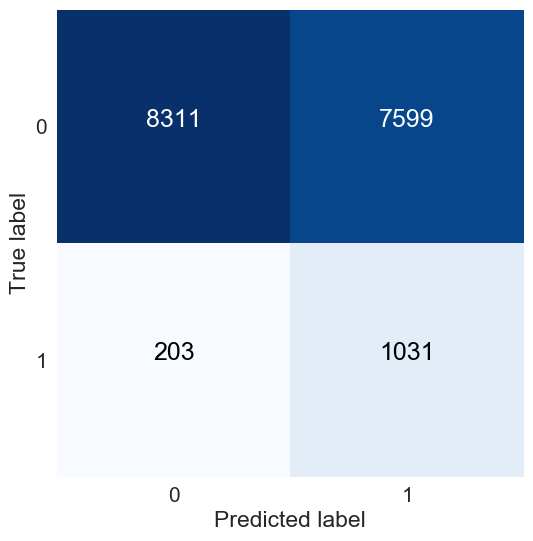

TP = 1031
FP = 7599
TN = 8311
FN = 203
 
Precision ( or TPR) = 0.12
Specificity ( or TNR) = 0.52
Recall = 0.84
F1 = 0.21


In [250]:
custom_confusion_matrix(clf = svm, x_data = xtest_pca, y_data = ytest)

In [251]:
#score(svm, xtest_pca, ytest, 'SVM')
#probability estimates are not available for loss='hinge' i.e. SVM

In [252]:
#custom_roc(clf = svm, x = xtest_pca, y = ytest)
#probability estimates are not available for loss='hinge' i.e. SVM

This seems like an acceptable model.  
Lets create a pipeline which we'll use later on to create an ensemble voting classifier model. 

In [253]:
pipeline_svm = imblearn_Pipeline([('smote', smote),
                                  ('sc', sc),
                                  ('pca_svm', PCA(n_components = 45)), 
                                  ('svm', svm)])

pipeline_svm

Pipeline(steps=[('smote', SMOTE(k=None, k_neighbors=5, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=None, ratio='auto', svm_estimator=None)), ('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca_svm', PCA(copy=True, iterated_power='auto', n_components=45,...=1, penalty='none', power_t=0.5, random_state=0, shuffle=True,
       verbose=0, warm_start=False))])

### Decision Tree

Decision tree learners build a model in the form of a tree structure. The model comprises of a series of logical decisions, with decision nodes that indicate a decision to be made on a specific attribute. Each of these decision nodes splits into further branches that indicate the decision's choices. The tree is terminated at leaf nodes (sometimes referred to as terminal nodes) that then states the result of following a combination of decisions.  

As the decision tree actually builds a model in the style of a flowchart, it is extremely useful for interpretation purposes. It's also useful for applications where transparency is required.  

On the downside though, they can be extremely sensitive to small perturbations in the data. They also tend to overfit although this can be remedied through either validation methods and/or pruning.

In [254]:
from sklearn.tree import DecisionTreeClassifier

There are a few hyperparameters one can tune for Decision Tree models.  

* criterion refers to the the function you want to use to measure the quality of a split. This particular implementation of the Random Forests model supports the Gini impurity and “entropy” for the information gain. 

* splitter refers totThe strategy used to choose the split at each node. This can be either “best” or “random.”

* max_features refers to the number of features to use for each split (this is the random feature selection we mentioned earlier)

* max_depth refers to how far nodes should be expanded. For example, you can produce fully grown trees (i.e. until all the leaves are pure).

* min_samples_split refers to the minimum number of samples required to perform a split at a node.

* min_samples_leaf refers to the minimum number of samples required to be at a leaf node.

* min_weight_fraction_leaf refers to the minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

* bootstrap refers to whether bootstrap samples are used when building trees.

* class_weight : These are the weights associated with classes. This can be:
 * “balanced” uses the values of y to automatically adjust weights inversely proportional to class frequencies 
 * None (all classes are supposed to have weight one)

In [255]:
if tuning==True:

    parameters = {'criterion': ['gini', 'entropy'], 
                  'splitter': ['best', 'random'],
                  'max_features': sp_uniform_rand(0, 1),
                  'max_depth': sp_randint(2, 200), 
                  'min_samples_split': sp_randint(2, 1000),
                  'min_samples_leaf': sp_randint(2, 1000),
                  'min_weight_fraction_leaf': sp_uniform_rand(0, 0.5), 
                  'class_weight': ['balanced', None]
                 }

    # create and fit a decision tree, testing each parameter with random samples
    grid = RandomizedSearchCV(estimator = DecisionTreeClassifier(random_state = 0), 
                              param_distributions = parameters,
                              scoring = scorer,
                              cv = 5,
                              n_iter = 200)

    grid = grid.fit(xtrain_resampled, ytrain_resampled)

    # summarize the results of the grid search
    print('Best score', str(round(grid.best_score_, 2)))
    print(grid.best_params_)

Let's fit a Decision Tree model with the best parameters we got from our cross validation procedure above. 

In [256]:
if tuning==True:
    
    tree = DecisionTreeClassifier(**grid.best_params_)
    
if tuning==False:
    
    # for max overall score   
    #tree = DecisionTreeClassifier(class_weight = None, 
    #                              min_samples_leaf = 15, 
    #                              min_samples_split = 844, 
    #                              max_depth = 197, 
    #                              max_features = 0.470755200073251, 
    #                              splitter = 'best', 
    #                              criterion = 'entropy', 
    #                              min_weight_fraction_leaf = 0.0035488332005566003,
    #                              random_state = 0)
    
    # for max precision
    tree = DecisionTreeClassifier(min_samples_split = 912, 
                                  class_weight = None, 
                                  max_depth = 112, 
                                  min_samples_leaf = 978, 
                                  splitter = 'best', 
                                  criterion = 'gini', 
                                  min_weight_fraction_leaf = 0.23549902595957611, 
                                  max_features = 0.94175560228777766,
                                  random_state = 0)

tree.fit(xtrain_resampled, ytrain_resampled)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=112,
            max_features=0.9417556022877777, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=978,
            min_samples_split=912,
            min_weight_fraction_leaf=0.2354990259595761, presort=False,
            random_state=0, splitter='best')

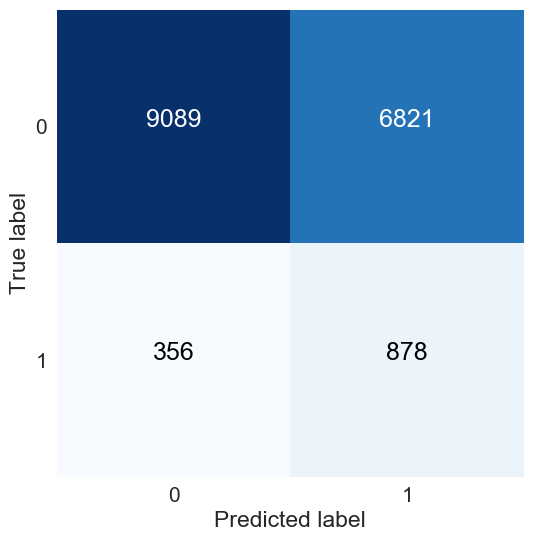

TP = 878
FP = 6821
TN = 9089
FN = 356
 
Precision ( or TPR) = 0.11
Specificity ( or TNR) = 0.57
Recall = 0.71
F1 = 0.2


In [257]:
custom_confusion_matrix(clf = tree, x_data = xtest, y_data = ytest)

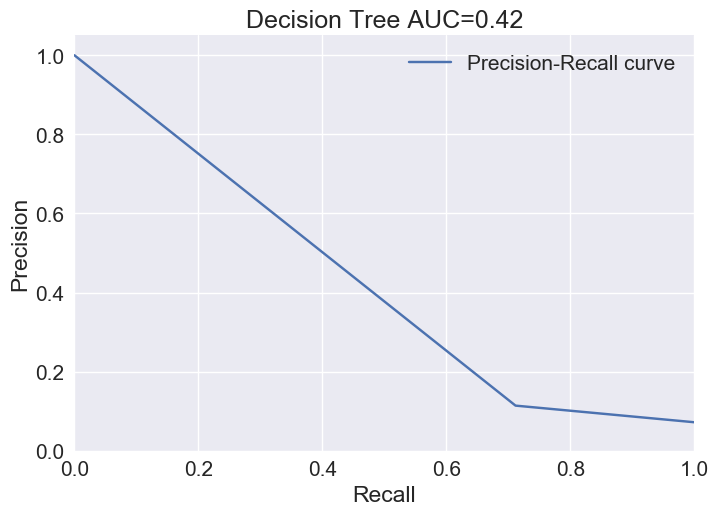

In [258]:
score(tree, xtest, ytest, 'Decision Tree')

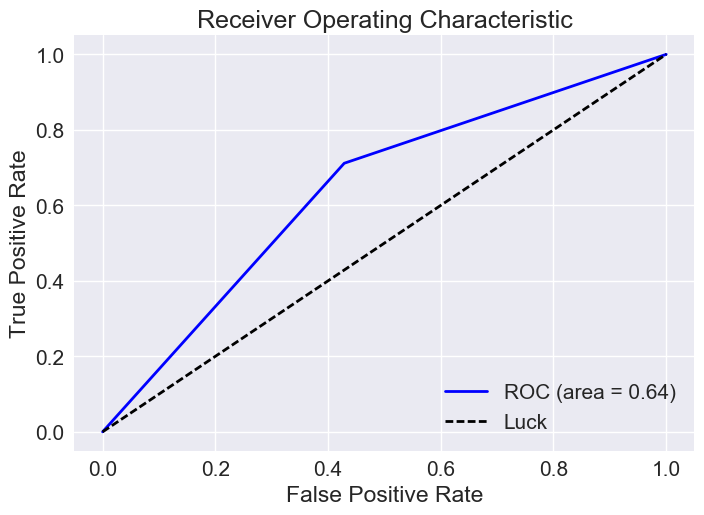

In [259]:
custom_roc(clf = tree, x = xtest, y = ytest)

This seems like an acceptable model.  
Lets create a pipeline which we'll use later on to create an ensemble voting classifier model. 

In [260]:
pipeline_tree = imblearn_Pipeline([('smote', smote),
                                   ('tree', tree)])

pipeline_tree

Pipeline(steps=[('smote', SMOTE(k=None, k_neighbors=5, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=None, ratio='auto', svm_estimator=None)), ('tree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=112,
            max_features=0.9417556022877777, max...ight_fraction_leaf=0.2354990259595761, presort=False,
            random_state=0, splitter='best'))])

### Random Forests

The Random Forests model is a form of Bootstrap aggregating, more commonly referred to as bagging.  

Bagging is a technique for reducing the variance of your prediction by generating additional data for training from your training data. By drawing combinations with replacemenet, you are able to produce multisets of the same cardinality/size as your original training data. 

In addition to bagging, the Random Forests model adds random feature selection to further increase the diversity of the underlying decision tree models. This helps to avoid overfitting. After the ensemble of trees is generated, the model uses a vote to combine the trees' predictions and make a final prediction. 

It is one of the most accurate learning algorithms available. It has a relatively small number of hyper-paramters that require tuning. It can handle high dimensional datasets. It can be used to get estimates of what variables are important in the classification. Also, its a very efficient algorithm!

On the downside though, Random Forests model are not very interpretable. There is also evidence to suggest that the Random Forests models tend to overfit on datasets with noisy classification tasks.

In [261]:
from sklearn.ensemble import RandomForestClassifier

There are a few hyperparameters one can tune for Random Forests models.  

* n_estimators refers to the number of trees in the forest. Generally, you want this as high as possible. The only limit really is the amount of computational power available to you. 

* Criterion refers to the the function you want to use to measure the quality of a split. This particular implementation of the Random Forests model supports the Gini impurity and “entropy” for the information gain. 

* max_features refers to the number of features to use for each split (this is the random feature selection we mentioned earlier)

* max_depth refers to how far nodes should be expanded. For example, you can produce fully grown trees (i.e. until all the leaves are pure).

* min_samples_split refers to the minimum number of samples required to perform a split at a node.

* min_samples_leaf refers to the minimum number of samples required to be at a leaf node.

* min_weight_fraction_leaf refers to the minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

* bootstrap refers to whether bootstrap samples are used when building trees.

* class_weight : These are the weights associated with classes. This can be:
 * “balanced” uses the values of y to automatically adjust weights inversely proportional to class frequencies 
 * “balanced_subsample” is the same as “balanced” except that weights are computed based on the bootstrap sample for every tree grown
 * None (all classes are supposed to have weight one)


In [262]:
if tuning==True:

    # prepare a range of parameter values to test
    parameters = {'n_estimators' : [10, 100, 500], 
                  'criterion': ['gini', 'entropy'], 
                  'max_features': sp_uniform_rand(0, 1), # chooses a percentage of features between 0 and 1
                  'max_depth': sp_randint(2, 200), 
                  'min_samples_split': sp_randint(2, 1000),
                  'min_samples_leaf': sp_randint(2, 1000),
                  'min_weight_fraction_leaf': sp_uniform_rand(0, 0.5), 
                  'bootstrap': [True],
                  'class_weight': ['balanced', 'balanced_subsample', None]
                 }

    # create and fit a decision tree, testing each parameter with random samples
    grid = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 0, n_jobs = 2), 
                              param_distributions = parameters,
                              scoring = scorer,
                              cv = 5,
                              n_iter = 200)

    grid = grid.fit(xtrain_resampled, ytrain_resampled)

    # summarize the results of the grid search
    print('Best score', str(round(grid.best_score_, 2))) #0.25
    print(grid.best_params_)

Let's fit a Random Forests model with the best parameters we got from our cross validation procedure above. 

In [263]:
if tuning==True:

    forest = RandomForestClassifier(**grid.best_params_)
    
if tuning==False:

    # for max overall score
    #forest = RandomForestClassifier(class_weight = 'balanced', 
    #                                min_samples_leaf = 95, 
    #                                min_samples_split = 337, 
    #                                max_depth = 171, 
    #                                max_features = 0.89878843971842626, 
    #                                n_estimators = 100, 
    #                                criterion = 'entropy',
    #                                min_weight_fraction_leaf = 0.0076717996317994808,
    #                                n_jobs = 2)
    
    # for max precision
    forest = RandomForestClassifier(n_estimators = 500, 
                                    min_samples_split = 168, 
                                    bootstrap = True, 
                                    max_depth = 104, 
                                    min_samples_leaf = 501, 
                                    criterion = 'entropy', 
                                    min_weight_fraction_leaf = 0.0045344988718392099, 
                                    max_features = 0.29955876174028062, 
                                    class_weight = 'balanced_subsample', 
                                    random_state = 0)

forest.fit(xtrain_resampled, ytrain_resampled)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='entropy', max_depth=104,
            max_features=0.2995587617402806, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=501,
            min_samples_split=168,
            min_weight_fraction_leaf=0.00453449887183921, n_estimators=500,
            n_jobs=1, oob_score=False, random_state=0, verbose=0,
            warm_start=False)

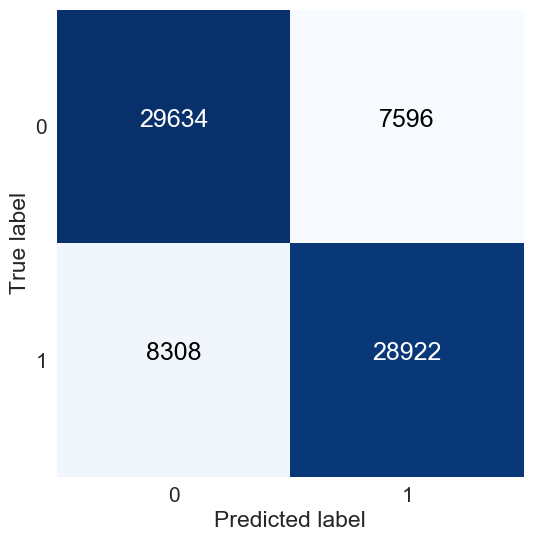

TP = 28922
FP = 7596
TN = 29634
FN = 8308
 
Precision ( or TPR) = 0.79
Specificity ( or TNR) = 0.8
Recall = 0.78
F1 = 0.78


In [264]:
custom_confusion_matrix(clf = forest, x_data = xtrain_resampled, y_data = ytrain_resampled)

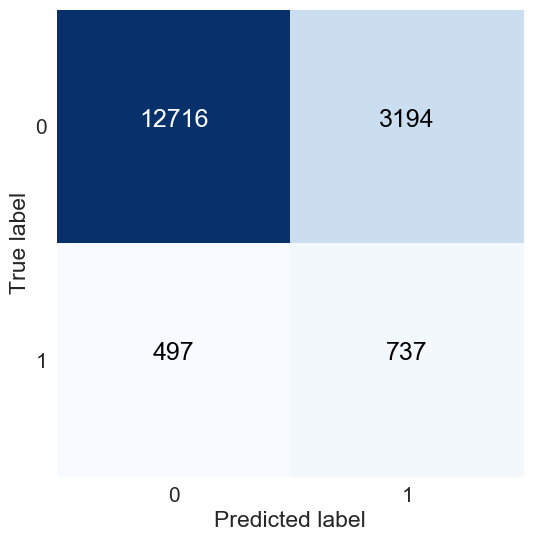

TP = 737
FP = 3194
TN = 12716
FN = 497
 
Precision ( or TPR) = 0.19
Specificity ( or TNR) = 0.8
Recall = 0.6
F1 = 0.29


In [265]:
custom_confusion_matrix(clf = forest, x_data = xtest, y_data = ytest)

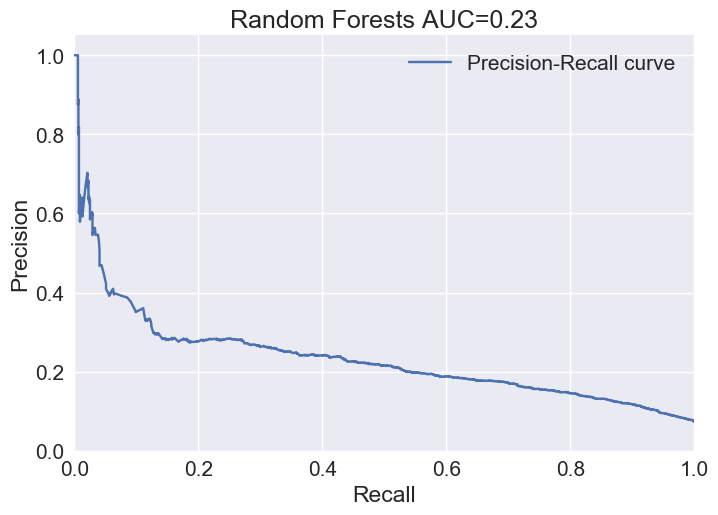

In [266]:
score(forest, xtest, ytest, 'Random Forests')

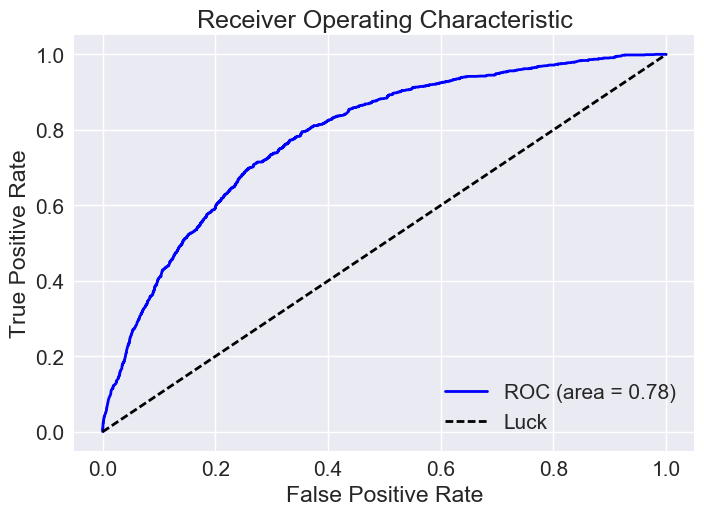

In [267]:
custom_roc(clf = forest, x = xtest, y = ytest)

This seems like an acceptable model.  
Lets create a pipeline which we'll use later on to create an ensemble voting classifier model. 

In [268]:
pipeline_forest = imblearn_Pipeline([('smote', smote),
                                     ('forest', forest)])

pipeline_forest

Pipeline(steps=[('smote', SMOTE(k=None, k_neighbors=5, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=None, ratio='auto', svm_estimator=None)), ('forest', RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='entropy', max_depth=104,...0,
            n_jobs=1, oob_score=False, random_state=0, verbose=0,
            warm_start=False))])

Another valuble piece of information we can get from Random Forests models is feature importance.  

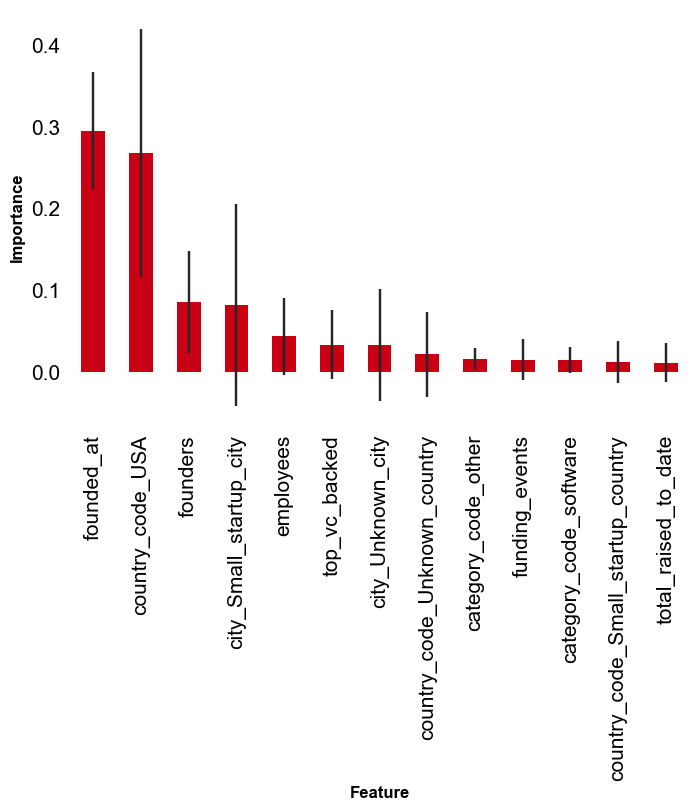

In [269]:
feature_names = pd.DataFrame(data = np.array(all_data.copy().drop(['id', 'status'], axis = 1).columns.values), columns = ['feature'])
importance = pd.DataFrame(data = forest.feature_importances_, columns = ['importance'])
std = pd.DataFrame(data = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0), columns = ['std'])

temp = pd.concat([feature_names, importance, std], axis=1, join='inner')

temp = temp.sort_values(by = 'importance', ascending = False)

temp = temp[temp.importance>np.mean(temp.importance)]

ax = temp.plot(x = 'feature', y = 'importance', yerr = 'std', rot = 90, kind = 'bar', color = color1)

ax.legend().set_visible(False)

ax.set_facecolor('white')
ax.grid(b=False)

ax.tick_params(axis=u'both', which=u'both',length=0)

#ax.set_title("", main_font,  fontweight = 'bold', fontsize = 15, position = [.5,1.05])
ax.set_ylabel("Importance", main_font, fontsize = 12, fontstyle = 'normal', fontweight = 'bold', color = graph_font_color)
ax.set_xlabel("Feature", main_font, fontsize = 12, fontstyle = 'normal', fontweight = 'bold', color = graph_font_color)

ax.tick_params(axis='x', colors=graph_font_color)
ax.tick_params(axis='y', colors=graph_font_color)

if export_fig==True:
    plt.savefig(fig_path + 'rf_feature_importance.png', bbox_inches='tight', transparent=True)

### Gradient Boosting

While Random Forests models utilize bagging principles, Gradient Boosting is a boosting method. 

Boosting is an ensembling technique, i.e. a prediction is made by an ensemble of simpler estimators, usually decision trees. 

When you add more decision trees to a random forest, they decide what they think **independently** of all the other trees. This is to say that they learn on their own. When it's time to make a prediction, each decision tree throws in its own uninfluenced opinion into the pot and the average decision is the prediction.  

Gradient boosting is similar in that there are several decision trees that also each make a vote. The difference is that there is a **chain** of decision trees. Instead of each tree learning in isolation, each time you add a new tree, the new tree tries to improve a bit on what the rest of the chain already thinks. The "improvement" here is to find areas of misclassification and then “boost” the importance of those incorrectly predicted data points. And then repeat. 

Below is a step by step breakdown of how the algorthim works:  

 1. Beginning with an unweighted dataset, the first classifier attempts to model the outcome.  
 2. Examples that the classifier predicted correctly will be less likely to appear in the training dataset for the following classifier. Conversely, this means that the difficult-to-classify examples will appear more frequently in the training dataset.  
 3. As additional rounds of weak learners are added, they are trained on data with successively more difficult examples. The process continues until the desired overall error rate is reached or performance no longer improves. 
 4. At this point, each classifier's vote is weighted according to its accuracy on the training data on which it was built.  

The great thing about gradient boosting is that it is highly customizable to the particular needs of the application,e.g. they can be learned with respect to different loss functions. 

On the downside though, this means they need a lot of tuning to get to optimal performance. The sequential nature of the boosting method also means that it cannot be parallelized and therefore takes longer to learn.  

In [270]:
from sklearn.ensemble import GradientBoostingClassifier

There are a few hyperparameters one can tune for Gradient models.  

* n_estimators refers to the number of trees in the forest. Generally, you want this as high as possible. The only limit really is the amount of computational power available to you. 

* Criterion refers to the the function you want to use to measure the quality of a split. This particular implementation of the Random Forests model supports the Gini impurity and “entropy” for the information gain. 

* max_features refers to the number of features to use for each split (this is the random feature selection we mentioned earlier)

* max_depth refers to how far nodes should be expanded. For example, you can produce fully grown trees (i.e. until all the leaves are pure).

* min_samples_split refers to the minimum number of samples required to perform a split at a node.

* min_samples_leaf refers to the minimum number of samples required to be at a leaf node.

* min_weight_fraction_leaf refers to the minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

* subsample refers to the fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting and also a reduction of variance and an increase in bias.

In [271]:
if tuning==True:

    # prepare a range of parameter values to test
    parameters = {'loss': ['deviance', 'exponential'],
                  'learning_rate': sp_uniform_rand(0,1), 
                  'n_estimators' : [10, 100, 500], 
                  'criterion': ['friedman_mse'], 
                  'max_features': sp_uniform_rand(0, 1),
                  'max_depth': sp_randint(2, 200), 
                  'min_samples_split': sp_randint(2, 1000),
                  'min_samples_leaf': sp_randint(2, 1000),
                  'min_weight_fraction_leaf': sp_uniform_rand(0, 0.5), 
                  'subsample': sp_uniform_rand(0,1)
                 }

    # create and fit a decision tree, testing each parameter with random samples
    grid = RandomizedSearchCV(estimator = GradientBoostingClassifier(random_state = 0), 
                              param_distributions = parameters,
                              scoring = scorer,
                              cv = 5,
                              n_iter = 200)

    grid = grid.fit(xtrain_resampled, ytrain_resampled)

    # summarize the results of the grid search
    print('Best score', str(round(grid.best_score_, 2)))
    print(grid.best_params_)

Let's fit a Gradient Boosted Trees model with the best parameters we got from our cross validation procedure above. 

In [272]:
if tuning==True:

    gbc = GradientBoostingClassifier(**grid.best_params_)

if tuning==False:

    # for max overall score
    #gbc = GradientBoostingClassifier(max_features = 0.93279347770335852, 
    #                                 min_samples_leaf = 285,
    #                                 min_samples_split = 465,
    #                                 max_depth = 77,
    #                                 learning_rate = 0.19128343814331872, 
    #                                 loss = 'exponential', 
    #                                 subsample = 0.63670954449124284, 
    #                                 n_estimators = 500, 
    #                                 criterion = 'friedman_mse', 
    #                                 min_weight_fraction_leaf = 0.012679640800067338)
    
    # for max precision
    gbc = GradientBoostingClassifier(min_samples_leaf = 314, 
                                     min_samples_split = 902, 
                                     max_depth = 13, 
                                     n_estimators = 100, 
                                     learning_rate = 0.40925918389231597, 
                                     subsample = 0.58380118878195797, 
                                     criterion = 'friedman_mse', 
                                     loss = 'deviance', 
                                     max_features = 0.72238967745915206, 
                                     min_weight_fraction_leaf = 0.0096872007938483273, 
                                     random_state = 0)

gbc.fit(xtrain_resampled, ytrain_resampled)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.40925918389231597, loss='deviance',
              max_depth=13, max_features=0.7223896774591521,
              max_leaf_nodes=None, min_impurity_split=1e-07,
              min_samples_leaf=314, min_samples_split=902,
              min_weight_fraction_leaf=0.009687200793848327,
              n_estimators=100, presort='auto', random_state=0,
              subsample=0.583801188781958, verbose=0, warm_start=False)

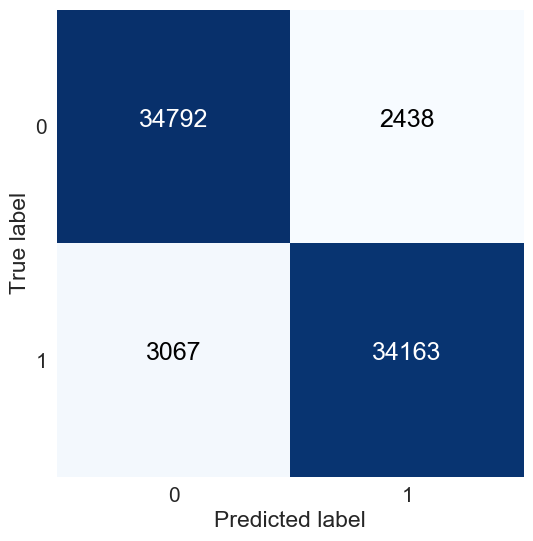

TP = 34163
FP = 2438
TN = 34792
FN = 3067
 
Precision ( or TPR) = 0.93
Specificity ( or TNR) = 0.93
Recall = 0.92
F1 = 0.93


In [273]:
custom_confusion_matrix(clf = gbc, x_data = xtrain_resampled, y_data = ytrain_resampled)

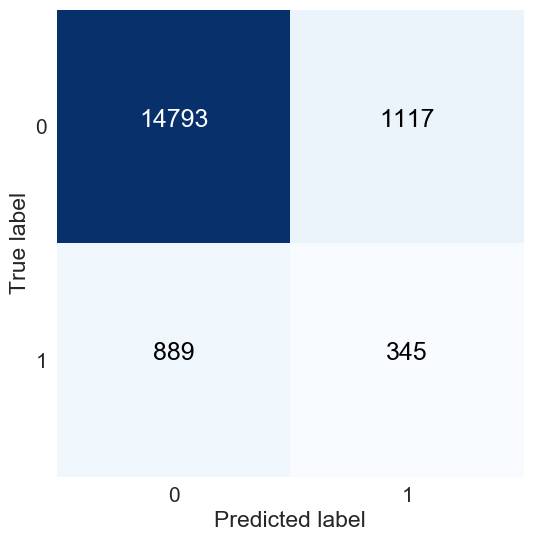

TP = 345
FP = 1117
TN = 14793
FN = 889
 
Precision ( or TPR) = 0.24
Specificity ( or TNR) = 0.93
Recall = 0.28
F1 = 0.26


In [274]:
custom_confusion_matrix(clf = gbc, x_data = xtest, y_data = ytest)

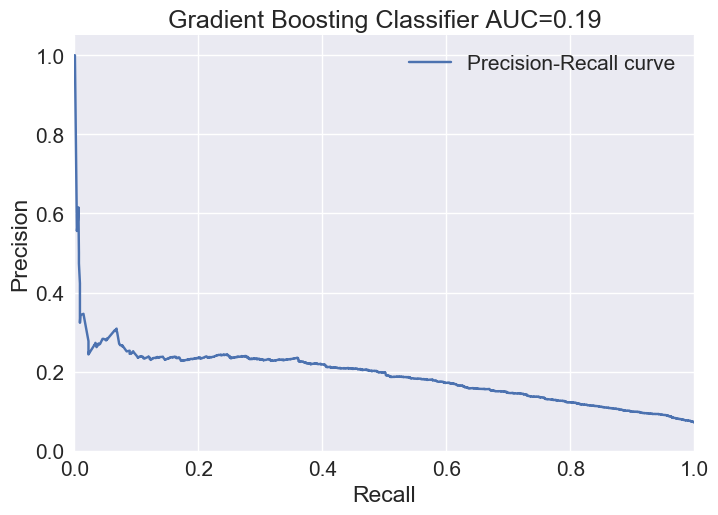

In [275]:
score(gbc, xtest, ytest, 'Gradient Boosting Classifier')

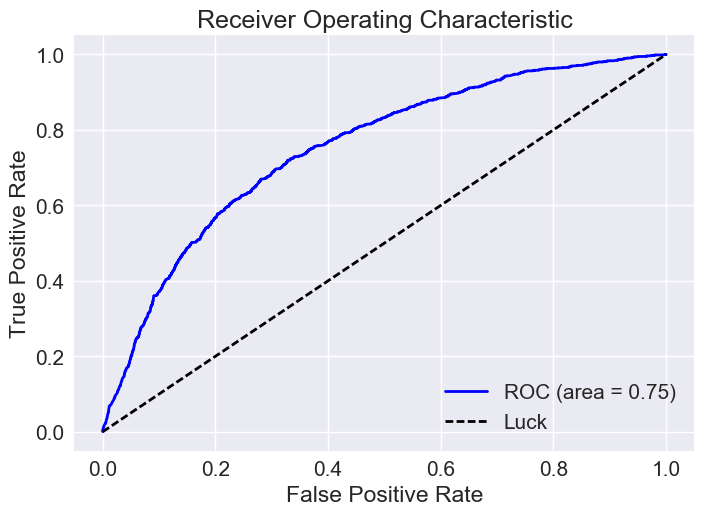

In [276]:
custom_roc(clf = gbc, x = xtest, y = ytest)

This seems like an acceptable model.  
Lets create a pipeline which we'll use later on to create an ensemble voting classifier model. 

In [277]:
pipeline_gbc = imblearn_Pipeline([('smote', smote),
                                  ('gbc', gbc)])

pipeline_gbc

Pipeline(steps=[('smote', SMOTE(k=None, k_neighbors=5, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=None, ratio='auto', svm_estimator=None)), ('gbc', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.40925918389231597, loss='devia...rt='auto', random_state=0,
              subsample=0.583801188781958, verbose=0, warm_start=False))])

### Ensemble

Ensemble modelling involves essentially combining a diverse set of learners (individual models) together. It usually pays off to apply ensemble learning over and above the various individual models you might be building. We will attempt this now and use a majority voting system to determines the final prediction for each startup.  

In [278]:
from sklearn.ensemble import VotingClassifier

estimators = []

#estimators.append(('MNB', pipeline_mnb))
#estimators.append(('KNN', pipeline_knn)) # very slow & no probability estimates for this one so cannot be used with soft voting
#estimators.append(('SVM', pipeline_svm)) # very slow & no probability estimates for this one so cannot be used with soft voting
estimators.append(('DT', pipeline_tree))
estimators.append(('RF', pipeline_forest))
estimators.append(('GBC', pipeline_gbc))

# create the ensemble model
ensemble = VotingClassifier(estimators, 
                            voting = 'soft', # 'soft' means probability from each classifier is multiplied by respective weight
                            weights = None, # Uses uniform weights if None. 
                            #weights = [0.8, 1.2, 1, 1.5],
                            n_jobs = -1)

ensemble.fit(xtrain, ytrain)

VotingClassifier(estimators=[('DT', Pipeline(steps=[('smote', SMOTE(k=None, k_neighbors=5, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=None, ratio='auto', svm_estimator=None)), ('tree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=112,
            max_feat...'auto', random_state=0,
              subsample=0.583801188781958, verbose=0, warm_start=False))]))],
         n_jobs=-1, voting='soft', weights=None)

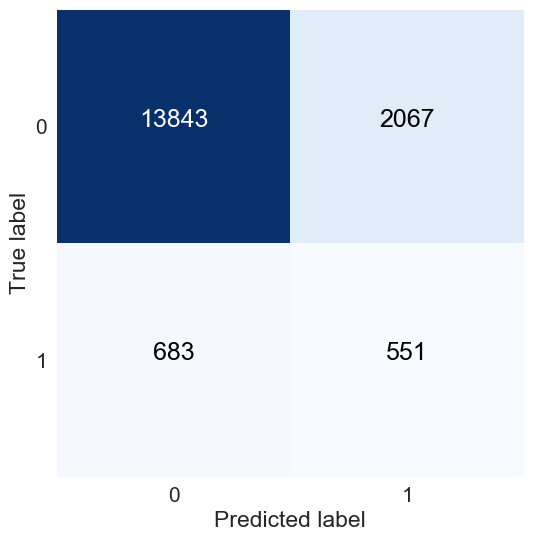

TP = 551
FP = 2067
TN = 13843
FN = 683
 
Precision ( or TPR) = 0.21
Specificity ( or TNR) = 0.87
Recall = 0.45
F1 = 0.29


In [279]:
custom_confusion_matrix(clf = ensemble, x_data = xtest, y_data = ytest)

In [280]:
custom_confusion_matrix(clf = ensemble, x_data = xtest, y_data = ytest, deck=True)

In [281]:
#score(ensemble, xtest, ytest, 'Ensemble')

In [282]:
#custom_roc(clf = ensemble, x = xtest, y = ytest)

Alright, so our final model was an ensemble of MNB, KNN, SVM, Decision Tree, Random Forests and Gradient Boosting.  
We see that this does better than just our basic Multinomial Naive Bayes modelacross all measures.  
Nevertheless, it still does slightly worse than VCs from just the precision perspective.  

## Error Analysis

Let's try to figure out where our ensemble model is struggling exactly.  

In [283]:
# get IDs
predictions = pd.concat([xtest, all_data[['id']]], axis=1, join='inner')

# get object names
predictions = pd.merge(predictions, cb_objects[['id', 'name',]], how='left', left_on = 'id', right_on = 'id')

# function for gathering variables
def gather(df, key, value, cols):
    id_vars = [ col for col in df.columns if col not in cols ]
    id_values = cols
    var_name = key
    value_name = value
    return pd.melt(df, id_vars, id_values, var_name, value_name )

# gather dummified variables
predictions = gather(predictions, 'country_code', 'temp', [col for col in list(predictions) if col.startswith('country_code_')])
predictions = predictions[predictions.temp==1].drop('temp', axis = 1)
predictions['country_code'] = predictions.country_code.replace(value = '', to_replace= 'country_code_', regex = True)

predictions = gather(predictions, 'city', 'temp', [col for col in list(predictions) if col.startswith('city_')])
predictions = predictions[predictions.temp==1].drop('temp', axis = 1)
predictions['city'] = predictions.city.replace(value = '', to_replace= 'city_', regex = True)

predictions = gather(predictions, 'category_code', 'temp', [col for col in list(predictions) if col.startswith('category_')])
predictions = predictions[predictions.temp==1].drop('temp', axis = 1)
predictions['category_code'] = predictions.category_code.replace(value = '', to_replace= 'category_code_', regex = True)

# add true status
predictions['true_status'] = ytest

# add predicted status
predictions['predicted_status'] = ensemble.predict(X =  xtest)

predictions.head()

,founded_at,board,employees,founders,milestones,funding_events,total_raised_to_date,last_raised_amount,top_vc_backed,tc_articles,companies_founded_previously,id,name,country_code,city,category_code,true_status,predicted_status
15,2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,c:24066,ViralTracker,Small_startup_country,Amsterdam,advertising,0,0
28,2009,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,c:49360,IMBULL,Small_startup_country,Amsterdam,advertising,0,0
30,2005,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,c:52870,Adrime,Small_startup_country,Amsterdam,advertising,1,1
37,2010,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,c:75893,Kuvva.com,Small_startup_country,Amsterdam,advertising,0,0
83,2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,c:195141,Real Normal Productions,USA,Austin,advertising,0,0


### Precision

As we saw earlier, our precision score is the worst parts of our model.  
Maybe, our model fails to correctly predict positive exits for startups in certain sectors? 

In [284]:
temp = predictions.copy()

temp = temp[['category_code', 'true_status', 'predicted_status']]
temp = temp[temp.predicted_status==1]

temp = temp.groupby('category_code').sum().reset_index()

temp = temp[temp.predicted_status>50]

temp['prcnt_predicted'] = temp.true_status/temp.predicted_status
temp['prcnt_not_predicted'] = 1 - temp.prcnt_predicted

temp = temp.drop(['true_status', 'predicted_status'], axis = 1)
temp = temp.sort_values(by = 'prcnt_predicted', ascending=True)
#temp = temp[['category', 'prcnt_not_predicted', 'prcnt_predicted']]

temp.head()

,category_code,prcnt_predicted,prcnt_not_predicted
24,network_hosting,0.174603,0.825397
9,enterprise,0.178571,0.821429
0,advertising,0.181347,0.818653
21,mobile,0.184874,0.815126
3,biotech,0.185567,0.814433


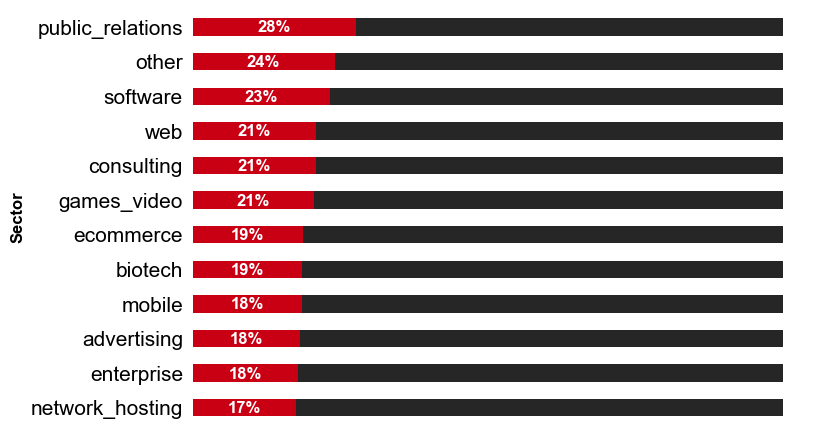

In [285]:
ax = temp.plot.barh(x = 'category_code', stacked=True, color = [color1, color3])

ax.legend().set_visible(False)

ax.set_facecolor('white')
ax.grid(b=False)

#ax.set_title("Positive vs Negative Exits by Category", main_font, fontweight = 'bold', fontsize = 12, position = [.5,1.05])
ax.set_ylabel("Sector", main_font, fontsize = 12, fontstyle = 'normal', fontweight = 'bold', color = graph_font_color)

ax.set_xlabel("", main_font, fontsize = 12, fontstyle = 'normal', fontweight = 'bold', color = graph_font_color)
ax.get_xaxis().set_visible(False)

ax.tick_params(axis='x', colors=graph_font_color)
ax.tick_params(axis='y', colors=graph_font_color)

for i, x in enumerate(temp.prcnt_predicted):
    ax.text(x = x/2, y = i-0.15, s = np.where(x>0.07, str(int(round(x*100, 0))) + '%', ''), ha='center', color = graph_font_color_2, fontsize = 12, fontstyle = 'normal', fontweight = 'bold')

if export_fig==True:
    plt.savefig(fig_path + 'precision_by_category.png', bbox_inches='tight', transparent=True)

In [286]:
temp = predictions.copy()

# Define bins as 0 to 1, 1 to 1M, 1M to 3M, 3M to 5M, 5M to 10M, 10M to 1B 
bins = [-1, 1, 1000000, 3000000, 5000000, 10000000, 1000000000]

# Create names for the four groups
group_names = ['\\$0', '\\$0 to \\$1M', '\\$1M to \\$3M', '\\$3M to \\$5M', '\\$5M to \\$10M', '\\$10M to \\$1B']

# Cut total_raised_to_date
temp['funding_category'] = pd.cut(temp.total_raised_to_date, bins, labels=group_names)

temp = temp[['funding_category', 'true_status', 'predicted_status']]
temp = temp[temp.predicted_status==1]

temp = temp.groupby('funding_category').sum().reset_index()
temp['prcnt_predicted'] = temp.true_status/temp.predicted_status
temp['prcnt_not_predicted'] = 1 - temp.prcnt_predicted

temp = temp.drop(['true_status', 'predicted_status'], axis = 1)

temp.head()

,funding_category,prcnt_predicted,prcnt_not_predicted
0,\$0,0.204686,0.795314
1,\$0 to \$1M,0.250000,0.750000
2,\$1M to \$3M,0.168831,0.831169
3,\$3M to \$5M,0.218750,0.781250
4,\$5M to \$10M,0.341463,0.658537


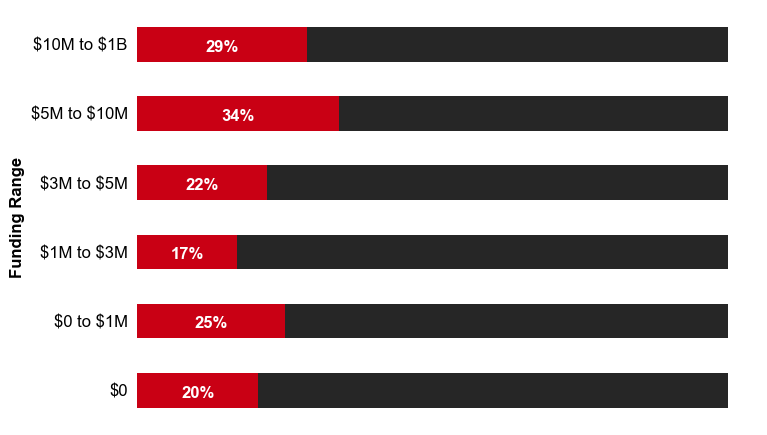

In [287]:
ax = temp.plot.barh(x = 'funding_category', stacked=True, color = [color1, color3], linewidth=2)

ax.legend().set_visible(False)

ax.set_facecolor('white')
ax.grid(b=False)

#ax.set_title("Positive vs Negative Exits by Category", main_font, fontweight = 'bold', fontsize = 12, position = [.5,1.05])

ax.set_ylabel("Funding Range", main_font, fontsize = 12, fontstyle = 'normal', fontweight = 'bold', color = graph_font_color)
ax.tick_params(axis='y', labelsize = 12)

ax.set_xlabel("", main_font, fontsize = 12, fontstyle = 'normal', fontweight = 'bold', color = graph_font_color)
ax.get_xaxis().set_visible(False)

ax.tick_params(axis='x', colors=graph_font_color)
ax.tick_params(axis='y', colors=graph_font_color)

for i, x in enumerate(temp.prcnt_predicted):
    ax.text(x = x - x/2, y = i-0.1, s = str(int(round(x*100, 0))) + '%', ha='center', fontsize = 12, fontstyle = 'normal', fontweight = 'bold', color = graph_font_color_2)
    
if export_fig==True:
    plt.savefig(fig_path + 'precision_by_funding_range.png', bbox_inches='tight', transparent=True)

### Recall

As we saw earlier, our recall score is one of the worst parts of our model.  
Maybe, our model fails to correctly predict positive exits for startups in certain sectors? 

In [288]:
temp = predictions.copy()

temp = temp[['category_code', 'true_status', 'predicted_status']]
temp = temp[temp.true_status==1]

temp = temp.groupby('category_code').sum().reset_index()

temp = temp[temp.true_status>40]

temp['prcnt_predicted'] = temp.predicted_status/temp.true_status
temp['prcnt_not_predicted'] = 1 - temp.prcnt_predicted

temp = temp.drop(['true_status', 'predicted_status'], axis = 1)
temp = temp.sort_values(by = 'prcnt_predicted', ascending=True)
#temp = temp[['category', 'prcnt_not_predicted', 'prcnt_predicted']]

temp.head()

,category_code,prcnt_predicted,prcnt_not_predicted
7,ecommerce,0.387097,0.612903
24,other,0.390625,0.609375
20,mobile,0.407407,0.592593
9,enterprise,0.408163,0.591837
12,games_video,0.409091,0.590909


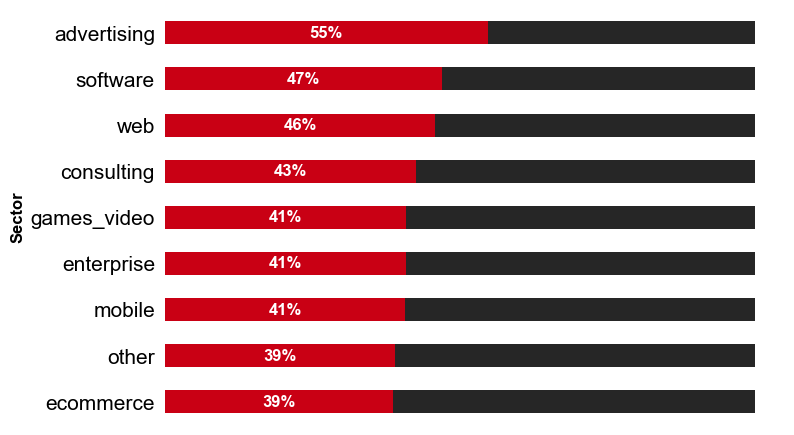

In [289]:
ax = temp.plot.barh(x = 'category_code', stacked=True, color = [color1, color3])

ax.legend().set_visible(False)

ax.set_facecolor('white')
ax.grid(b=False)

#ax.set_title("Positive vs Negative Exits by Category", main_font, fontweight = 'bold', fontsize = 12, position = [.5,1.05])
ax.set_ylabel("Sector", main_font, fontsize = 12, fontstyle = 'normal', fontweight = 'bold', color = graph_font_color)

ax.set_xlabel("", main_font, fontsize = 12, fontstyle = 'normal', fontweight = 'bold', color = graph_font_color)
ax.get_xaxis().set_visible(False)

ax.tick_params(axis='x', colors=graph_font_color)
ax.tick_params(axis='y', colors=graph_font_color)

for i, x in enumerate(temp.prcnt_predicted):
    ax.text(x = x/2, y = i-0.1, s = np.where(x>0.07, str(int(round(x*100, 0))) + '%', ''), ha='center', color = graph_font_color_2, fontsize = 12, fontstyle = 'normal', fontweight = 'bold')

if export_fig==True:
    plt.savefig(fig_path + 'recall_by_category.png', bbox_inches='tight', transparent=True)

Seems like we're not doing a particularly good job across the board.  
Let's see how things look when we compare recall across different funding ranges. 

Is it certain funding categories where it fails? 

In [290]:
temp = predictions.copy()

# Define bins as 0 to 1, 1 to 1M, 1M to 3M, 3M to 5M, 5M to 10M, 10M to 1B 
bins = [-1, 1, 1000000, 3000000, 5000000, 10000000, 1000000000]

# Create names for the four groups
group_names = ['\\$0', '\\$0 to \\$1M', '\\$1M to \\$3M', '\\$3M to \\$5M', '\\$5M to \\$10M', '\\$10M to \\$1B']

# Cut total_raised_to_date
temp['funding_category'] = pd.cut(temp.total_raised_to_date, bins, labels=group_names)

temp = temp[['funding_category', 'true_status', 'predicted_status']]
temp = temp[temp.true_status==1]

temp = temp.groupby('funding_category').sum().reset_index()
temp['prcnt_predicted'] = temp.predicted_status/temp.true_status
temp['prcnt_not_predicted'] = 1 - temp.prcnt_predicted

temp = temp.drop(['true_status', 'predicted_status'], axis = 1)

temp.head()

,funding_category,prcnt_predicted,prcnt_not_predicted
0,\$0,0.435560,0.564440
1,\$0 to \$1M,0.573770,0.426230
2,\$1M to \$3M,0.393939,0.606061
3,\$3M to \$5M,0.388889,0.611111
4,\$5M to \$10M,0.636364,0.363636


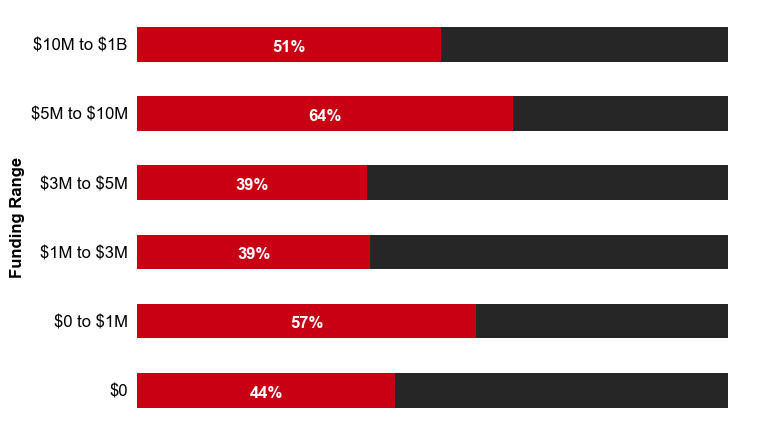

In [291]:
ax = temp.plot.barh(x = 'funding_category', stacked=True, color = [color1, color3], linewidth=2)

ax.legend().set_visible(False)

ax.set_facecolor('white')
ax.grid(b=False)

#ax.set_title("Positive vs Negative Exits by Category", main_font, fontweight = 'bold', fontsize = 12, position = [.5,1.05])

ax.set_ylabel("Funding Range", main_font, fontsize = 12, fontstyle = 'normal', fontweight = 'bold', color = graph_font_color)
ax.tick_params(axis='y', labelsize = 12)

ax.set_xlabel("", main_font, fontsize = 12, fontstyle = 'normal', fontweight = 'bold', color = graph_font_color)
ax.get_xaxis().set_visible(False)

ax.tick_params(axis='x', colors=graph_font_color)
ax.tick_params(axis='y', colors=graph_font_color)

for i, x in enumerate(temp.prcnt_predicted):
    ax.text(x = x - x/2, y = i-0.1, s = str(int(round(x*100, 0))) + '%', ha='center', fontsize = 12, fontstyle = 'normal', fontweight = 'bold', color = graph_font_color_2)
    
if export_fig==True:
    plt.savefig(fig_path + 'recall_by_funding_range.png', bbox_inches='tight', transparent=True)

No clear trends there.  
What about with different numbers of top VC backers? 

In [292]:
temp = predictions.copy()

temp = temp[['top_vc_backed', 'true_status', 'predicted_status']]

# Define bins as 0 to 1, 1 to 1M, 1M to 3M, 3M to 5M, 5M to 10M, 10M to 1B 
bins = [0, 1, 2, 4, 6, 8, 100]

# Create names for the four groups
group_names = ['0', '1', '2 - 3', '4 - 5', '6 - 7', '8+']

# Cut total_raised_to_date
temp['number_of_top_vc_backers'] = pd.cut(temp.top_vc_backed, bins, labels=group_names)

#temp['top_vc_backed'] = np.where(temp.top_vc_backed>0, 1, 0)
temp = temp[temp.true_status==1]

temp = temp.groupby('number_of_top_vc_backers').sum().reset_index()
temp['prcnt_predicted'] = temp.predicted_status/temp.true_status
temp['prcnt_not_predicted'] = 1 - temp.prcnt_predicted

temp = temp.drop(['top_vc_backed', 'true_status', 'predicted_status'], axis = 1)

temp.head()

,number_of_top_vc_backers,prcnt_predicted,prcnt_not_predicted
0,0,0.444444,0.555556
1,1,0.333333,0.666667
2,2 - 3,0.666667,0.333333
3,4 - 5,0.777778,0.222222
4,6 - 7,0.500000,0.500000


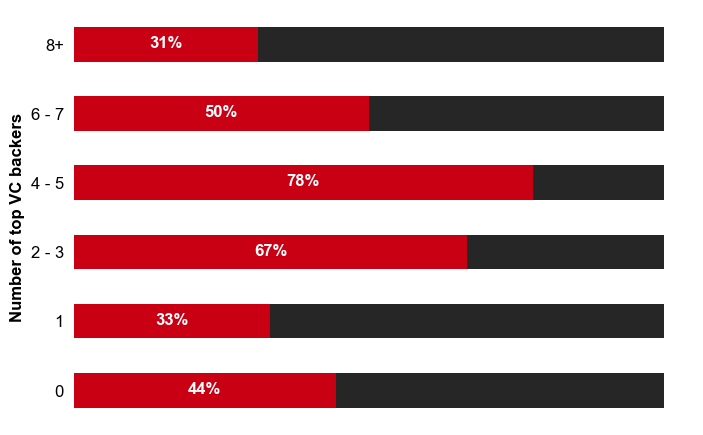

In [293]:
ax = temp.plot.barh(x = 'number_of_top_vc_backers', stacked=True, color = [color1, color3])

ax.legend().set_visible(False)

ax.set_facecolor('white')
ax.grid(b=False)

ax.set_ylabel("Number of top VC backers", main_font, fontsize = 12, fontstyle = 'normal', fontweight = 'bold', color = graph_font_color)
ax.tick_params(axis='y', labelsize = 12)

ax.set_xlabel("", main_font, fontsize = 12, fontstyle = 'normal', fontweight = 'bold')
ax.get_xaxis().set_visible(False)

ax.tick_params(axis='x', colors=graph_font_color)
ax.tick_params(axis='y', colors=graph_font_color)

for i, x in enumerate(temp.prcnt_predicted):
    ax.text(x = x - x/2, y = i-0.05, s = str(int(round(x*100, 0))) + '%', ha='center', color = graph_font_color_2, fontsize = 12, fontstyle = 'normal', fontweight = 'bold')

if export_fig==True:
    plt.savefig(fig_path + 'recall_by_top_VC_backers.png', bbox_inches='tight', transparent=True)

Let's try to find some well-known examples of startups in our testing data that were actually correctly predicted as positive exits.

In [294]:
temp = predictions

temp = temp[(temp.true_status==1) & (temp.predicted_status==1)]

# make it easier to find well-known startups
temp = temp[(temp.country_code=='USA')]
temp = temp.sort_values(by='total_raised_to_date', ascending = False)
temp = temp.sort_values(by='founded_at', ascending = True)

temp = temp[['id', 'name', 'country_code', 'category_code', 'founded_at', 'true_status', 'predicted_status']]

temp.head(50)

,id,name,country_code,category_code,founded_at,true_status,predicted_status
490892,c:56080,Journey Education Marketing,USA,other,1990,1,1
96791,c:59656,TechNow,USA,consulting,1990,1,1
130222,c:46412,Munchkin,USA,ecommerce,1991,1,1
491710,c:71997,Northern Leasing,USA,other,1991,1,1
94025,c:260728,PA & Associates Healthcare,USA,consulting,1991,1,1
714078,c:61452,A to Z Learning,USA,web,1992,1,1
641793,c:21663,Avocent,USA,software,1992,1,1
714204,c:6428,InsureMe,USA,web,1993,1,1
714348,c:6716,Anastasia Date,USA,web,1993,1,1
640331,c:143175,Partners 1993,USA,software,1993,1,1


## Evaluation

### Venture Capital Primer

#### VC returns

As an asset class, venture capital returns average around XXX. 

How does this compare to other asset classes?

#### How does a VC generate returns?

According to research by [William Sahlman](http://www.hbs.edu/faculty/Pages/profile.aspx?facId=6544) at Harvard Business School, 80% of a typical venture capital fund’s returns are generated by just 20% of its investments. Naturally, these 20% need to be big wins to make up for the amount invested across the whole portfolio (allowing a venture capital fund to break even) and then some (to actually generate a return). 

The only way to have a chance at those big wins is to set a high hurdle for each prospective investment. This is one of the most common reasons why VCs will often turn down investment opportunities; most ventures simply can't scale to the size VCs need. Traditionally, the industry rule of thumb has been to look for deals that might be able to return 10x your money in five years. 

### Conclusions

Our final model successfully matched VC 'hits' performance and beat 'returns' typically generated by VCs. 

The aim of this project was to show that machine learning techniques can be used to predict whether a startup will eventually achieve a positive exit outcome or a negative exit outcome. ✓

Show that Venture Capital investors can be replaced by computers ✗  
In this sense, VC jobs are safe ... for now.   
And to be fair, we'll always need some VCs around.  

Because investors only have access to data on past events, we will use only the data available for the first 3 years of each startups life. In fact, we see that using more than 3 years of data does not necessarily improve our algorithms accuracy. 

### Recommendations

As our precision is still fairly low (although comparable to VCs), this model should be used in combination with human judgement and more as a way to quickly shortlist ventures from hundreds of thousands.  

There is still a long way to go before we can replace VCs. As such, my reccomendaton would be to iterate upon this model with the following suggested improvements:  

 * Use CrunchBase API to fill in data that was previously missing  
 * Use CrunchBase API to gather data on for more recent years
 * Try topic modelling - value in mining textual data
 * Try Bayesian Networks
 * Try Deep Learning models